 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5607) </b> </h1> </center>

<b> Programming Assignment - 02 </b>

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.



<b> Assignment on Linear Regression </b> <br>
This programing assignment is divided in to two parts covering the understanding of basic parts where you will get a chance to code the linear regression problem in both data space and kernel space. You will also implement regularizers to understand the bias-variance trade-off problem. In contrast to the full batch training, you will also get chance to code the online training of linear regression problem as discussed in the class. Part1 will conclude with the implimentation of MAP estimate. Later, In part2 of the assignment you have to apply the learned basic concepts to real world problems. 




<center> <h2> <b> Understanding Basic Concepts </b> </h2> </center>


<b> Part - (1) :  Understanding Error Surfaces </b>

According to www.geogebra.org, the relationship between human height (in
inches) and weight (in pounds) is given by <br>
<center> $t = 3.86x - 110.42$ </center>

(a) Generate 25 meaningful data points from this relationship, mimicking a
noisy sensor, where the noise follows a zero mean Gaussian with a variance
of 20. Plot the scatter plot of the data. <br>
(b) Now, we need to estimate the above relationship from the noisy data
generated in (a) by fitting a line, i.e $\hat{t} = y(x,w) = w_{0} + w_{1}x$. Let us use least squares criterion discussed in the class to estimate the parameters $w_{0}$ and $w_{1}$ Generate and plot the error surface $J(w_{0},w_{1})$ associated with this approach. Locate the minimum on this error surface.<br>

(c) Estimate the parameters using least squares approach, and compare them
with the desired values.
<center> $\textbf{w}_{opt} = (\textbf{X}^{T}\textbf{X})^{-1}\textbf{X}^{T}\textbf{t}$</center>

(d) Report all your observations

In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections


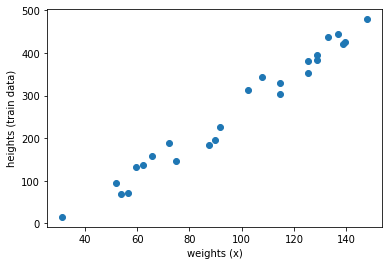

<Figure size 432x288 with 0 Axes>

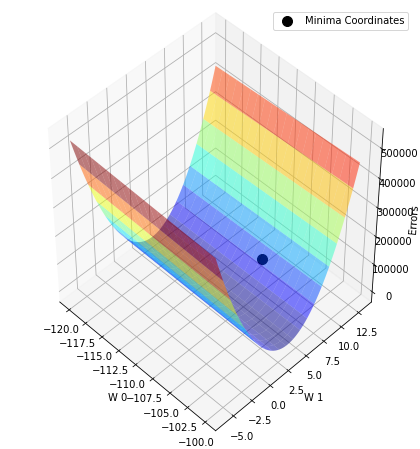

Minima of Error surface is at : W0 =  -109.6969696969697  W1 =  9.737373737373737
x shape:  (25, 2)  t shape:  (25, 1)
Weights from error surface approach are : W0 =  -109.6969696969697  W1 =  9.737373737373737
Whereas weights from LS approach are : W0 =  -110.42000000000075  W1 =  3.860000000000003


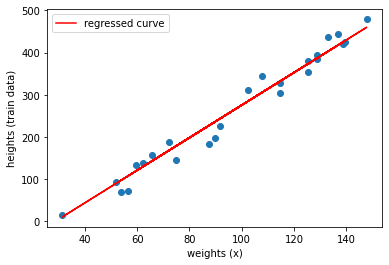

In [ ]:
########################################
#Generate meaningfull data 
########################################
def gnoise(mean, var, samples=1):
  return np.random.normal(mean,var,samples)

def generate_data(samples):
  x = np.random.uniform(30,150,(1, samples))
  t=3.86*x-110.42*np.ones((1, samples))
  return {'weights' : x.T, 'heights' : t.T, 'table': np.append(x,t, axis=0)}

samples = 25
mean = 0
variance = 20

data = generate_data(samples)
table = data['table']
noise = gnoise(mean,variance,samples)
train_data = table[1,:] + noise

########################################
#Plot scatter plot of data
########################################

plt.scatter(table[0,:],train_data)
plt.xlabel("weights (x)")
plt.ylabel("heights (train data)")

########################################
#Parameter prediction by locating the minima of error surface
########################################
#Complete the below error function 
def Error(w,t,x): #inputs : 1)weight 2)data i.e (t,x)
  y = np.matrix(x@w)
  m = np.size(y)
  e = np.matrix(t - y)
  error = float((1/(2*m)) * np.trace(e @ e.T))
  return error

def stack_onearray(x,N):
    one_array=np.ones((N,1))
    return np.hstack((one_array,x))

#Sample a bunch of w's around w_opt and compute the associated error
X = data['weights']
x = stack_onearray(X, samples)
t = data['heights']
y = np.reshape(train_data, (1, samples)).T
w_opt= (np.linalg.inv(x.T@x)@x.T)@t
W0, W1 = np.meshgrid(np.linspace(int(w_opt[0,0]-10),int(w_opt[0,0]+10),100),np.linspace(int(w_opt[1,0]-10),int(w_opt[1,0]+10),100))
zs = np.array([Error(np.array([[w0],[w1]]), t, x) for w0, w1 in zip(np.ravel(W0), np.ravel(W1)) ] )
errors = zs.reshape(W0.shape)

minima =  np.unravel_index(errors.argmin(), errors.shape)

#Plot 3D error surface and the corresponding contour plots
plt.figure()
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(W0, W1, errors, rstride = 5, cstride = 5, cmap = 'jet', alpha=0.5)
ax.scatter(W0[0, minima[0]], W1[minima[1], 0], label="Minima Coordinates",color="black",marker="o",s=100)

ax.set_xlabel('W 0')
ax.set_ylabel('W 1')
ax.set_zlabel('Errors')
ax.view_init(45, -45)
plt.legend()
plt.show()

#Locate the minima of the error surface
print("Minima of Error surface is at : W0 = ", W0[0, minima[0]], " W1 = ", W1[minima[1], 0])

########################################
#Least squares approach to estimate the weights
########################################
#Complete the below linear regression function
print("x shape: ", x.shape, " t shape: ", t.shape)

def LinearRegression(x,t,reg=False,lamda=0.01): #inputs : 1)input data i.e (x). 2)target i.e (t)
  if reg:
    a,b=(X.T@X).shape
    w_opt = (np.linalg.inv(x.T@x + lamda*np.eye(a,b))@x.T)@t;
  else:  
    w_opt = (np.linalg.inv(x.T@x)@x.T)@t
  return w_opt

#Estimate optimal weight's using "LinearRegression" function
optimal_weights = LinearRegression(x, t)

#Estimate the targets using the input x and the estimated weights
y = x @ optimal_weights

#Plot the estimated line on top of the above scatter plot
# xpoints=np.linspace(30,150)
plt.scatter(table[0,:],train_data)
plt.plot(table[0,:], y[:,0], c='r', label='regressed curve')
plt.xlabel("weights (x)")
plt.ylabel("heights (train data)")
plt.legend()


########################################
#Compare the estimated weight's using least squares approach with the error surface approach
########################################
print("Weights from error surface approach are : W0 = ", W0[0, minima[0]], " W1 = ", W1[minima[1], 0])
print("Whereas weights from LS approach are : W0 = ", w_opt[0,0], " W1 = ",w_opt[1,0])

<b> Part - (2) : Understanding model order and overfitting  </b>

(a). Generate  20  data  points  from $t_{n} = sin(2πx_{n}) + e_{n}$, where $x_{n} \in [0,1] $ and $e_{n} \thicksim \mathcal{N} (0,0.1)$ , and divide them into two sets, a training set and a testing set each containing 10 points <br>

(b). Fit  an $M^{th}$ degree  polynomial  to  the  training  data  using  least  squares approach, i.e.,
<center> $\hat{t_{n}} = w_{0}x + w_{1}x + .... +  w_{m}x^{m} + ... + w_{M}x^{M} $ </center> 

Use the estimated parameter vector $\textbf{w}$ , to predict the target values in training and testing datasets.  Plot the root mean squared error associated with each dataset, for M=0,1,...,9. Explain your results. <br>

(c) Increase the size of the training dataset to 100 points, and repeat (b). <br>

(d) Add a $l_{2}$ regularization term to the objective function in (b) and repeat (b) and (c).  Study the affect of Lagrange multiplier λ on the root mean squared error of the training and testing datasets <br>

(e) Modify the function in (a) to $t_{n}=5+sin(2πx_{n})+e_{n}$ to study the effect of regularizing the bias coefficient $w_{0}$.

(f) Report all your observations

(10, 1) (10, 1) (10, 1) (10, 1)


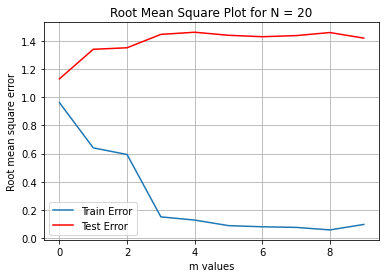

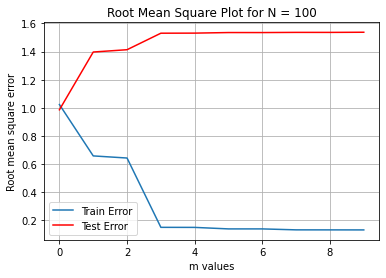

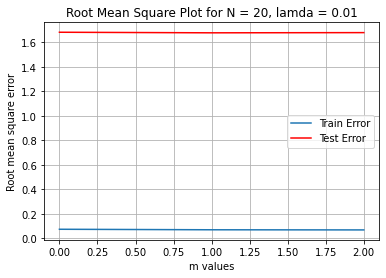

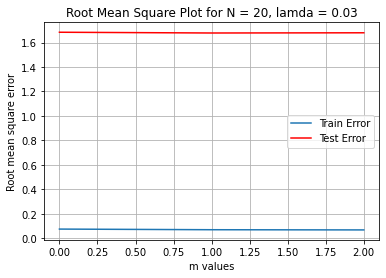

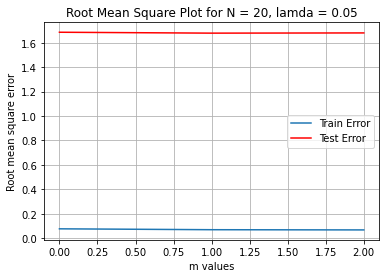

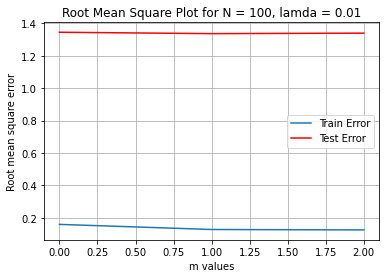

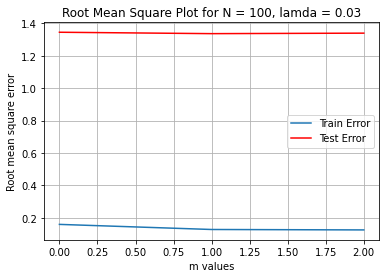

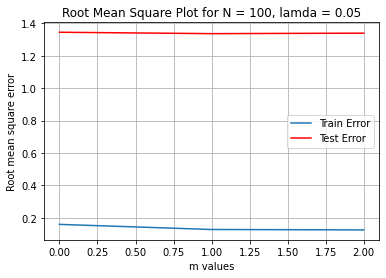

In [ ]:
########################################
#Generate 20 data points
########################################
def stack_onearraynew(x,N):
    one_array=np.ones((1,N))
    return np.vstack((one_array,x))

def genSinData(N,bias=False):
    data={}
    x=np.random.uniform(0,1,(1,N))
    if bias:
      t=5+np.sin(2*np.pi*x)+np.reshape(gnoise(0,0.1,N),(x.shape))
    else:
      t = np.sin(2*np.pi*x)+np.reshape(gnoise(0,0.1,N),(x.shape))
    data['input']=x.T
    data['target']=t.T
    return data


#Obtain train and test splits
n = 20;
dataset = genSinData(n)

x_train = dataset['input'][0:10,:]
x_test = dataset['input'][10:,:]
y_train = dataset['target'][0:10,:]
y_test = dataset['target'][10:,:]

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


########################################
#Fitting Mth degree polynomial using least squares approach
########################################
#Complete the function
def PolynomialFit(X_train,Y_train,M,lamda):
  if(M==0):
    phi=np.ones((1,X_train.shape[1]))
  else:
    phi=stack_onearraynew(X_train,X_train.shape[1])
    for i in range(2,M+1):
      phi=np.vstack((phi,X_train**i))
  weight_vector=LinearRegression(phi.T,Y_train.T, True, lamda).T
  return weight_vector, phi

# #Complete the function

def PolynomialPred(w_est,X_train,X_test,Y_train,Y_test, kernel):
  N=X_train.shape[1]
  y=w_est@kernel
  TrainError = np.sqrt(sum(((y-Y_train)**2).flatten())/(0.5*N))
  TestError = np.sqrt(sum(((y-Y_test)**2).flatten())/(0.5*N))
  return TrainError, TestError

# #Iterate through range of M values
M_range=list(range(10))
TrainError=np.array([])
TestError=np.array([])

for M in M_range:
  #Fit Mth order polynomial i.e estimate optimal w
  w_opt, phi = PolynomialFit(x_train.T, y_train.T, M, 0)

  #Predict errors on both training and testing data using estimated w
  trErr, teErr = PolynomialPred(w_opt, x_train.T, x_test.T, y_train.T, y_test.T, phi)

  #Store them for plotting
  TrainError=np.append(TrainError,trErr)
  TestError=np.append(TestError,teErr)

#Plot training error vs polynomial order and testing error vs polynomial order
plt.figure()            
plt.plot(TrainError,label='Train Error')
plt.plot(TestError,c='r',label='Test Error')
plt.xlabel("m values")
plt.ylabel("Root mean square error")
plt.title("Root Mean Square Plot for N = 20")
plt.legend()
plt.grid(True)

########################################
#Increase the size of training data set to 100 points and repeat the experiments
########################################
n = 100;
dataset = genSinData(n)

x_train = dataset['input'][0:50,:]
x_test = dataset['input'][50:,:]
y_train = dataset['target'][0:50,:]
y_test = dataset['target'][50:,:]

TrainError=np.array([])
TestError=np.array([])

for M in M_range:
  #Fit Mth order polynomial i.e estimate optimal w
  w_opt, phi = PolynomialFit(x_train.T, y_train.T, M, 0)

  #Predict errors on both training and testing data using estimated w
  trErr, teErr = PolynomialPred(w_opt, x_train.T, x_test.T, y_train.T, y_test.T, phi)

  #Store them for plotting
  TrainError=np.append(TrainError,trErr)
  TestError=np.append(TestError,teErr)

#Plot training error vs polynomial order and testing error vs polynomial order
plt.figure()            
plt.plot(TrainError,label='Train Error')
plt.plot(TestError,c='r',label='Test Error')
plt.xlabel("m values")
plt.ylabel("Root mean square error")
plt.title("Root Mean Square Plot for N = 100")
plt.legend()
plt.grid(True)

########################################
#Effect of regularization
########################################
#Consider a set of lambda's
lamda = [0.01, 0.03, 0.05]

n = 20;
dataset = genSinData(n)

x_train = dataset['input'][0:10,:]
x_test = dataset['input'][10:,:]
y_train = dataset['target'][0:10,:]
y_test = dataset['target'][10:,:]

#Repeat (b) and (c). Submit the plots for M=3,5,7
for lam in lamda:
  M_range=[3,5,7]
  TrainError=np.array([])
  TestError=np.array([])

  for M in M_range:
  #Fit Mth order polynomial i.e estimate optimal w
    w_opt, phi = PolynomialFit(x_train.T, y_train.T, M, lam)

  #Predict errors on both training and testing data using estimated w
    trErr, teErr = PolynomialPred(w_opt, x_train.T, x_test.T, y_train.T, y_test.T, phi)

  #Store them for plotting
    TrainError=np.append(TrainError,trErr)
    TestError=np.append(TestError,teErr)

#Plot training error vs polynomial order and testing error vs polynomial order
  plt.figure()            
  plt.plot(TrainError,label='Train Error')
  plt.plot(TestError,c='r',label='Test Error')
  plt.xlabel("m values")
  plt.ylabel("Root mean square error")
  plt.title("Root Mean Square Plot for N = 20, lamda = {}".format(lam))
  plt.legend()
  plt.grid(True)


n = 100;
dataset = genSinData(n)

x_train = dataset['input'][0:50,:]
x_test = dataset['input'][50:,:]
y_train = dataset['target'][0:50,:]
y_test = dataset['target'][50:,:]

for lam in lamda:
  M_range=[3,5,7]
  TrainError=np.array([])
  TestError=np.array([])

  for M in M_range:
  #Fit Mth order polynomial i.e estimate optimal w
    w_opt, phi = PolynomialFit(x_train.T, y_train.T, M, lam)

  #Predict errors on both training and testing data using estimated w
    trErr, teErr = PolynomialPred(w_opt, x_train.T, x_test.T, y_train.T, y_test.T, phi)

  #Store them for plotting
    TrainError=np.append(TrainError,trErr)
    TestError=np.append(TestError,teErr)

#Plot training error vs polynomial order and testing error vs polynomial order
  plt.figure()            
  plt.plot(TrainError,label='Train Error')
  plt.plot(TestError,c='r',label='Test Error')
  plt.xlabel("m values")
  plt.ylabel("Root mean square error")
  plt.title("Root Mean Square Plot for N = 100, lamda = {}".format(lam))
  plt.legend()
  plt.grid(True)

(100, 1) (100, 1) (100, 1) (100, 1)


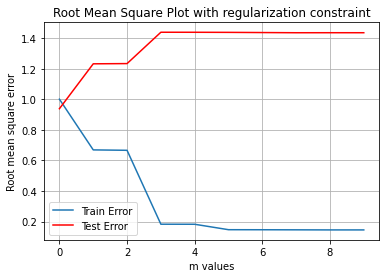

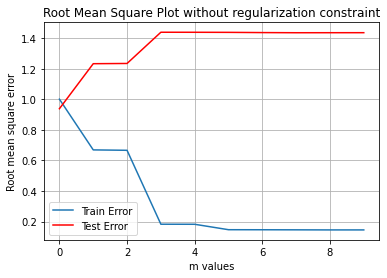

In [ ]:
########################################
#Effect of bias regularization
########################################
#Modify the function i.e include bias
# ======> modified in genSinData() function

#Generate data
n=200
dataset=genSinData(n,bias=True)
x_train=dataset['input'][0:100,:]
y_train=dataset['target'][0:100,:]
x_test=dataset['input'][100:,:]
y_test=dataset['target'][100:,:]

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

#Estimate the polynomial with and without regularization constraint
TrainError=np.array([])
TestError=np.array([])
M_range=list(range(10))

for M in M_range:
  #Fit Mth order polynomial i.e estimate optimal w
  w_opt, phi = PolynomialFit(x_train.T, y_train.T, M, 0)

  #Predict errors on both training and testing data using estimated w
  trErr, teErr = PolynomialPred(w_opt, x_train.T, x_test.T, y_train.T, y_test.T, phi)

  #Store them for plotting
  TrainError=np.append(TrainError,trErr)
  TestError=np.append(TestError,teErr)

#Plot training error vs polynomial order and testing error vs polynomial order
plt.figure()            
plt.plot(TrainError,label='Train Error')
plt.plot(TestError,c='r',label='Test Error')
plt.xlabel("m values")
plt.ylabel("Root mean square error")
plt.title("Root Mean Square Plot with regularization constraint")
plt.legend()
plt.grid(True)

TrainError=np.array([])
TestError=np.array([])

for M in M_range:
  #Fit Mth order polynomial i.e estimate optimal w
  w_opt, phi = PolynomialFit(x_train.T, y_train.T, M, 0.01)

  #Predict errors on both training and testing data using estimated w
  trErr, teErr = PolynomialPred(w_opt, x_train.T, x_test.T, y_train.T, y_test.T, phi)

  #Store them for plotting
  TrainError=np.append(TrainError,trErr)
  TestError=np.append(TestError,teErr)

#Plot training error vs polynomial order and testing error vs polynomial order
plt.figure()            
plt.plot(TrainError,label='Train Error')
plt.plot(TestError,c='r',label='Test Error')
plt.xlabel("m values")
plt.ylabel("Root mean square error")
plt.title("Root Mean Square Plot without regularization constraint")
plt.legend()
plt.grid(True)

<b> Part - (3) : Understanding choice of kernel  </b>


(a). Generate 100 data points from $t_{n}=sin(2πx_{n})+e_{n}$, where $x_{n} \in [0 1]$ and $e_{n} \thicksim \mathcal{N}(0,0.1)$, and divide them into two sets, a training set and a testing test each containing 50 points.  Fit an $M^{th}$ degree polynomial using polynomial,Gaussian and sigmoidal kernels, and study the goodness of fit in each case,for different model orders M

(b). Repeat (a) by modifying the target function to <br>
<center> $t_{n} = $ $\begin{cases}
 \text{sinusoid} + e_{n} , \;\; where \;\; x  \in [0,1) \\
 \text{triangle} + e_{n} , \;\; where \;\; x  \in [1,2) \\
 \text{Gaussian} + e_{n} , \;\; where \;\; x  \in [2,3) \\ 
\end{cases}$ </center>

Clearly discuss your observations/results for each of the three kernels.

(c). Report all your observations

(50, 1) (50, 1) (50, 1) (50, 1)


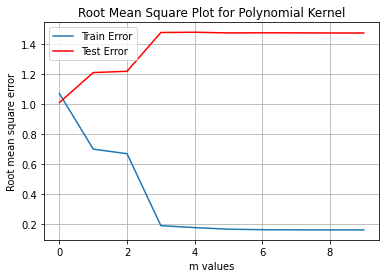

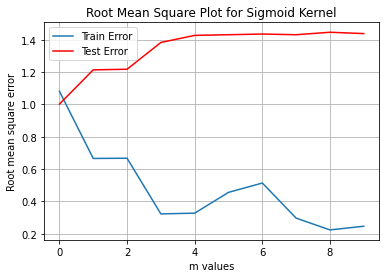

In [ ]:
########################################
#Generate 100 data points
########################################
n=100
dataset=genSinData(n)

#Obtain train and test splits
#Take even samples for training and odd samples for testing
x=dataset['input']
y=dataset['target']

x_train=x[0::2,:]
x_test = x[1::2,:]
y_train = y[0::2,:]
y_test = y[1::2,:]

print(x_train.shape, x_test.shape, y_test.shape, y_train.shape)

def sigmoid(a):
    return 1/(1+np.exp(a))

def KernelRegressionFit(X_train,Y_train,kernelType,M,lamda):
  #kernelType : {Polynomial,Gaussian,Sigmoid}
  if kernelType == "Polynomial":
    if(M==0):
      phi=np.ones((1,X_train.shape[0]))
    else:
      phi=stack_onearraynew(X_train.T,X_train.shape[0])
      for i in range(2,M+1):
        phi=np.vstack((phi,X_train.T**i))

  elif kernelType == "Gaussian":
    mean = np.arange(M)
    sigma = 0.6
    x = X_train.T
    if (len(mean)==1):
        phi=np.reshape(np.array([np.exp(-(x-mean[i]*np.ones(x.shape))/(2*variance)) for i in range(len(mean))]).squeeze(),(1,x.shape[1]))
    else:
        phi=np.array([np.exp(-(x-mean[i]*np.ones(x.shape))**2/(2*sigma**2)) for i in range(len(mean))]).squeeze()

  elif kernelType == "Sigmoid":
    mean = np.arange(M)
    sigma = 0.6
    x = X_train.T
    if (len(mean)==1):
        phi=np.reshape(np.array([sigmoid((x-mean[i]*np.ones(x.shape))/sigma) for i in range(len(mean))]).squeeze(),(1,x.shape[1]))
    else:
        phi=np.array([sigmoid((x-mean[i]*np.ones(x.shape))/sigma) for i in range(len(mean))]).squeeze()

  w_opt = LinearRegression(phi.T, Y_train, True, lamda)

  return w_opt, phi.T

def KernelRegressionPred(w_est,X_train,Y_train,X_test,Y_test,kernelType, phi):
  #kernelType : {Polynomial,Gaussian,Sigmoid}
  N=X_train.shape[0]
  y = phi@w_est
  TrainError = np.sqrt(sum(((y-Y_train)**2).flatten())/(0.5*N))
  TestError = np.sqrt(sum(((y-Y_test)**2).flatten())/(0.5*N))

  return TrainError,TestError

#Iterate through range of M values
PolyTrainError=np.array([])
PolyTestError=np.array([])
SigTrainError=np.array([])
SigTestError=np.array([])

M_range=list(range(10))
for M in M_range:
  #Fit Mth order polynomial using three kernels i.e {Polynomial,Gaussian,Sigmoid}
  w_est_polynomial, polyPhi = KernelRegressionFit(x_train, y_train, "Polynomial", M, 0.01)
  w_est_sig, SigPhi = KernelRegressionFit(x_train, y_train, "Sigmoid", M+1, 0.01)

  #Predict errors on both training and testing data using estimated w
  trErrPoly, teErrPoly = KernelRegressionPred(w_est_polynomial,x_train,y_train,x_test,y_test,"Polynomial", polyPhi)
  trErrSig, teErrSig = KernelRegressionPred(w_est_sig,x_train,y_train,x_test,y_test,"Sigmoid", SigPhi)

  #Store them for plotting
  PolyTrainError=np.append(PolyTrainError,trErrPoly)
  PolyTestError=np.append(PolyTestError,teErrPoly)
  SigTrainError=np.append(SigTrainError,trErrSig)
  SigTestError=np.append(SigTestError,teErrSig)

#Plot training error vs polynomial order and testing error vs polynomial order for all the three different kernels
plt.figure()            
plt.plot(PolyTrainError,label='Train Error')
plt.plot(PolyTestError,c='r',label='Test Error')
plt.xlabel("m values")
plt.ylabel("Root mean square error")
plt.title("Root Mean Square Plot for Polynomial Kernel")
plt.legend()
plt.grid(True)

plt.figure()            
plt.plot(SigTrainError,label='Train Error')
plt.plot(SigTestError,c='r',label='Test Error')
plt.xlabel("m values")
plt.ylabel("Root mean square error")
plt.title("Root Mean Square Plot for Sigmoid Kernel")
plt.legend()
plt.grid(True)

Size of Training Inputs : (100, 1)
Size of Training Outputs : (100, 1)
Size of Test Inputs : (100, 1)
Size of Test Outputs : (100, 1)


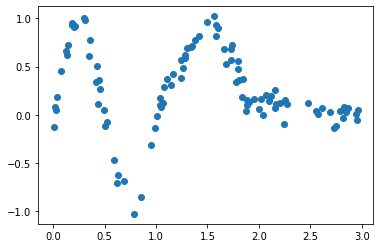

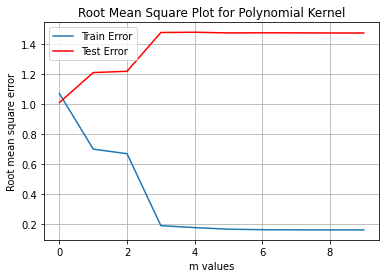

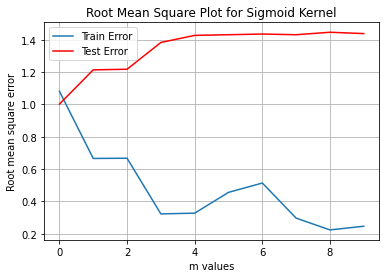

In [ ]:
########################################
#Repeat the experiments by changing target function
########################################

def newTargetData(N,mean=0,sigma=1):
    data_set={}
    t=np.array([])
    x=np.random.uniform(0,3,(1,N))
    if x.any()<0 or x.any()>3:
        print("input not in range between 0 and 3")
        exit()
    for i in x[0,:]:
        #sinusoid
        if 0<=i and i<1:
            t=np.append(t,np.sin(2*np.pi*i)+gnoise(0,0.1))
        #triangle
        if 1<=i and i<2:
            if 1<=i and i<1.5:
                t=np.append(t,2*i-2+gnoise(0,0.1))
            else:
                t=np.append(t,-2*i+4+gnoise(0,0.1))
        #gaussian
        if 2<=i and i<=3:
            t=np.append(t,np.exp(-(i-mean)**2/2*sigma**2)+gnoise(0,0.1))
    t=np.reshape(t,x.shape)
    data_set['input']=x
    data_set['target']=t
        
    return data_set

N=200
p=0.5
newdataset=newTargetData(N)
Xtr=newdataset['input'][:,0:int(p*N)].T
Ytr=newdataset['target'][:,0:int(p*N)].T
Xte=newdataset['input'][:,int(p*N):].T
Yte=newdataset['target'][:,int(p*N):].T

print("Size of Training Inputs :",Xtr.shape)
print("Size of Training Outputs :",Ytr.shape)
print("Size of Test Inputs :",Xte.shape)
print("Size of Test Outputs :",Yte.shape)

plt.scatter(Xtr,Ytr)

#Iterate through range of M values
PolyTrainError=np.array([])
PolyTestError=np.array([])
SigTrainError=np.array([])
SigTestError=np.array([])

M_range=list(range(10))
for M in M_range:
  #Fit Mth order polynomial using three kernels i.e {Polynomial,Gaussian,Sigmoid}
  w_est_polynomial, polyPhi = KernelRegressionFit(x_train, y_train, "Polynomial", M, 0.01)
  w_est_sig, SigPhi = KernelRegressionFit(x_train, y_train, "Sigmoid", M+1, 0.01)

  #Predict errors on both training and testing data using estimated w
  trErrPoly, teErrPoly = KernelRegressionPred(w_est_polynomial,x_train,y_train,x_test,y_test,"Polynomial", polyPhi)
  trErrSig, teErrSig = KernelRegressionPred(w_est_sig,x_train,y_train,x_test,y_test,"Sigmoid", SigPhi)

  #Store them for plotting
  PolyTrainError=np.append(PolyTrainError,trErrPoly)
  PolyTestError=np.append(PolyTestError,teErrPoly)
  SigTrainError=np.append(SigTrainError,trErrSig)
  SigTestError=np.append(SigTestError,teErrSig)

#Plot training error vs polynomial order and testing error vs polynomial order for all the three different kernels
plt.figure()            
plt.plot(PolyTrainError,label='Train Error')
plt.plot(PolyTestError,c='r',label='Test Error')
plt.xlabel("m values")
plt.ylabel("Root mean square error")
plt.title("Root Mean Square Plot for Polynomial Kernel")
plt.legend()
plt.grid(True)

plt.figure()            
plt.plot(SigTrainError,label='Train Error')
plt.plot(SigTestError,c='r',label='Test Error')
plt.xlabel("m values")
plt.ylabel("Root mean square error")
plt.title("Root Mean Square Plot for Sigmoid Kernel")
plt.legend()
plt.grid(True)

<b> Part - (4) : Understanding online training  </b>

(a). Repeat 3(a) and 3(b) using stochastic gradient descent for weight update.Study the effect of step size η on convergence of the weights, and compare them to those obtained using closed form expressions in 3.  Plot the mse as a  function  of  iterations. 

(b). Study the effect of batch size on the speed of convergence

(c). Report all your observations

Bias without any kernel =  [0.59402035]
Coefficients without any kernel =  []
Mean absolute error  =  1.2100373368890003


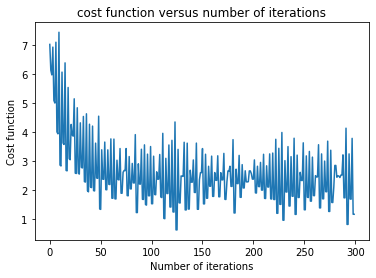

Bias with polynomial kernel of order 8 =  [0.06908678]
Coefficients with polynomial of oder 8 =  [[0.06908678]
 [0.06908678]
 [0.06908678]
 [0.06908678]
 [0.06908678]
 [0.06908678]
 [0.06908678]
 [0.06908678]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


minimum error is minimum for polynomial kernel is 86
Bias with sigmoid kernel of order 8 =  [0.26621849]
Coefficients with sigmoid of oder 8 =  [[2.66206400e-01]
 [1.33109243e-01]
 [1.20857519e-05]
 [5.48717195e-10]
 [2.49117221e-14]
 [1.13099044e-18]
 [5.13468863e-23]
 [2.33114503e-27]
 [1.05833821e-31]
 [4.80484803e-36]
 [2.18139763e-40]]
minimum error for sigmoid kernel is 185
 minimum error for gaussian kernel is 155
Bias with polynomial kernel of order 8 =  [0.07909725]
Coefficients with polynomial of oder 8 =  [[0.07909725]
 [0.07909725]
 [0.07909725]
 [0.07909725]
 [0.07909725]
 [0.07909725]
 [0.07909725]]
coefficients for polynomial kernel we get for model orders from 0 to 9 is [0.31684034 0.31684034 0.20948689 0.20948689 0.20948689 0.15584635
 0.15584635 0.15584635 0.15584635 0.12490714 0.12490714 0.12490714
 0.12490714 0.12490714 0.10512952 0.10512952 0.10512952 0.10512952
 0.10512952 0.10512952 0.08742857 0.08742857 0.08742857 0.08742857
 0.08742857 0.08742857 0.08742857 0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:107: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:107: RuntimeWarning: overflow encountered in multiply


Text(0.5, 1.0, 'error versus batch size')

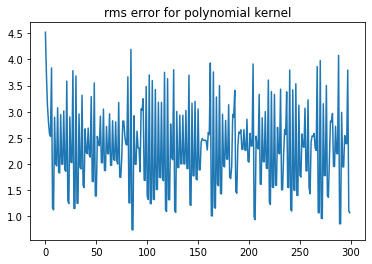

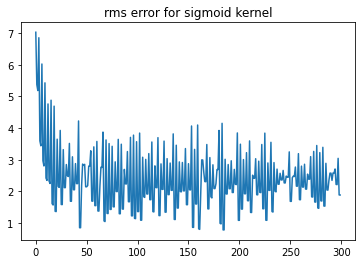

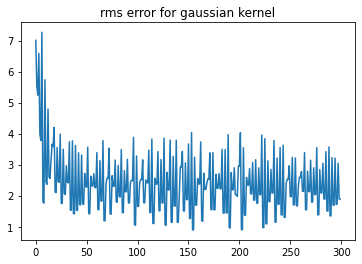

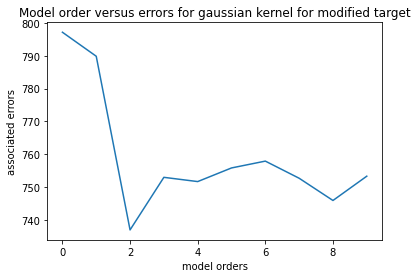

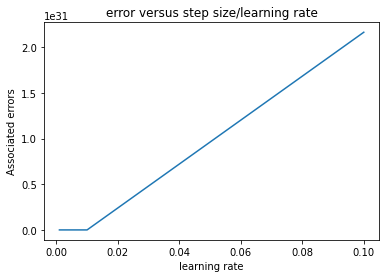

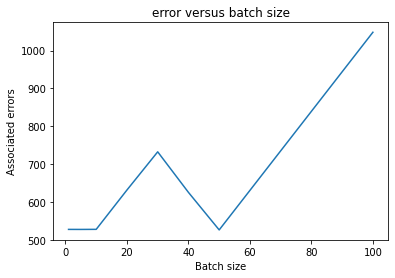

In [ ]:
########################################
#Repeat 3(a) and 3(b) using stochastic gradient descent for weight update ( plot required results )
########################################

def load_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(domain[0], domain[1], sample_size)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def sinusoidal(x):
    return np.sin(2 * np.pi * x)

def sigmoid(z): 
  return 1 / (1 + np.exp(-z))

def gaussian_kernel(x, mu, s):
  return np.exp(-(x - mu)**2 / (2*s**2))

def gaussian_standard(x):
  return np.exp(-(x)**2 / (2 *1**2))
def sigmoid_kernel(x, mu, s): 
  return sigmoid((x - mu) / s)
def sigmoid_standard(x): 
  return sigmoid(x)
def gaussian_design_matrix(x, mus, s, bias=True):
    Phi = gaussian_kernel(x[:, np.newaxis], mus[np.newaxis, :], s)
    if bias:
        r, _ = Phi.shape
        onevect = np.ones(r)
        Phi = np.column_stack((onevect, Phi))
    return Phi

def sigmoid_design_matrix(x, mus, s, bias=True):
    Phi = sigmoid_kernel(x[:, np.newaxis], mus[np.newaxis, :], s)
    if bias:
        r, _ = Phi.shape
        onevect = np.ones(r)
        Phi = np.column_stack((onevect, Phi))
    return Phi

def polynomial_design_matrix(x, powers, bias=True):
    Phi = np.column_stack((x ** p for p in powers))
    if bias:
        r, _ = Phi.shape
        onevect = np.ones(r)
        Phi = np.column_stack((onevect, Phi))
    return Phi

def computeCost(X, y, theta):
    inner = np.power(((X @ theta.T) - y), 2) # @ means matrix multiplication of arrays. If we want to use * for multiplication we will have to convert all arrays to matrices
    return np.sum(inner) / (2 * len(X))

def gradientDescent(X, y, theta, alpha, iters):
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum((X @ theta.T - y) * X, axis=0)
        cost = computeCost(X, y, theta)
        # if i % 10 == 0: # just look at cost every ten loops for debugging
        #     print(cost)
    return (theta, cost)
# linear regression using "stochastic" gradient descent 
# function to compute hypothesis / predictions 
def hypothesis(X, theta): 
    return np.dot(X, theta) 
  
# function to compute gradient of error function w.r.t. theta 
def gradient(X, y, theta): 
    h = hypothesis(X, theta) 
    grad = np.dot(X.transpose(), (h - y)) 
    return grad 

# function to compute the error for current values of theta 
def cost(X, y, theta): 
    h = hypothesis(X, theta) 
    J = np.dot((h - y).transpose(), (h - y)) 
    J /= 2
    return J[0] 
  
# function to create a list containing various-batches 
def create_diff_batches(X, y, batch_size): 
    mini_batches = [] 
    data = np.hstack((X, y)) 
    np.random.shuffle(data) 
    n_minibatches = data.shape[0] // batch_size 
    i = 0
  
    for i in range(n_minibatches + 1): 
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    if data.shape[0] % batch_size != 0: 
        mini_batch = data[i * batch_size:data.shape[0]] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    return mini_batches 

# function to perform batch gradient descent #By default,batch size is 32
def gradientDescent(X, y, learning_rate = 0.001, batch_size = 32): 
    theta = np.zeros((X.shape[1], 1)) 
    error_list = [] 
    max_iters = 100
    for itr in range(max_iters): 
        mini_batches = create_diff_batches(X, y, batch_size) 
        for mini_batch in mini_batches: 
            X_mini, y_mini = mini_batch 
            theta = theta - learning_rate * gradient(X_mini, y_mini, theta) 
            error_list.append(cost(X_mini, y_mini, theta)) 
    return theta, error_list
#Now repeating ques 3 with this gradient descent algorithm
x,data = load_data(sinusoidal,100,np.sqrt(0.1)) #creating data set of 100 ,50 for training,50 for testing

data=np.reshape(data,(100,1))
x=np.reshape(x,(100,1))
# train-test-split i.e 50 for train and 50 for test
data = np.hstack((np.ones((data.shape[0], 1)), data)) 
x = np.hstack((np.ones((x.shape[0], 1)), x)) 
split_factor = 0.50
split = int(split_factor * data.shape[0]) 
  
X_train = x[:split, :-1] 
y_train = data[:split, -1].reshape((-1, 1)) 
X_test = x[split:, :-1] 
y_test = data[split:, -1].reshape((-1, 1))

#Performing gradient descent without any kernel 
theta, error_list = gradientDescent(X_train,y_train) 
print("Bias without any kernel = ", theta[0]) 
print("Coefficients without any kernel = ", theta[1:]) 
# predicting output for X_test 
y_pred = hypothesis(X_test,theta)
# calculating error in predictions 
error = np.sum(np.abs(y_test - y_pred) / y_test.shape[0]) 
print("Mean absolute error  = ", error) 
  
# visualising gradient descent 
plt.plot(error_list) 
plt.xlabel("Number of iterations") 
plt.ylabel("Cost function") 
plt.title("cost function versus number of iterations")
plt.show()

#Polynomial kernel
M=8 #let Model order is 8
powers=[i for i in range(M)]
P= polynomial_design_matrix(X_train, powers, bias=True)
theta, error_list = gradientDescent(P,y_train) 
print("Bias with polynomial kernel of order 8 = ", theta[0]) 
print("Coefficients with polynomial of oder 8 = ", theta[1:]) 

#3(a) repeating 3 (a) using gradient descent
# WITH POLYNOMIAL KERNEL
xpoints1 = np.linspace(0, 1,50) #with poynomial kernel
powers=[]
for i in range(10):
  powers=np.append(powers,i)
  X = polynomial_design_matrix(X_train, powers, bias=True)
  W,z = gradientDescent(X,y_train) # normal equation
  predicted=X.dot(W)
plt.figure()
plt.plot(z)
plt.title("rms error for polynomial kernel")
m=np.argmin(z)
print("minimum error is minimum for polynomial kernel is",m)
#With sigmoid kernel
#Sigmoid kernel
M=11 #let Model order is 11
X_train=X_train.ravel()
mus=np.arange(11)
P=sigmoid_design_matrix(X_train, mus, s=0.1, bias=True)
theta, error_list = gradientDescent(P,y_train) 
print("Bias with sigmoid kernel of order 8 = ", theta[0]) 
print("Coefficients with sigmoid of oder 8 = ", theta[1:]) 
#Model order ranges from 0 to 9
for i in range(10):
  mus=np.arange(i)
  X = sigmoid_design_matrix(X_train, mus, s=0.3, bias=True)
  W,z = gradientDescent(X,y_train) 
  predicted=X.dot(W)
plt.figure()
plt.plot(z)
plt.title("rms error for sigmoid kernel")
m=np.argmin(z)
print("minimum error for sigmoid kernel is",m)
#WITH GAUSSIAN KERNEL
for i in range(10):  
  mus=np.arange(i)
  X = gaussian_design_matrix(X_train, mus, s=0.3, bias=True)
  W,z= gradientDescent(X,y_train) 
  predicted=X.dot(W)
plt.figure()
plt.plot(z)
plt.title("rms error for gaussian kernel")
m=np.argmin(z)
print( " minimum error for gaussian kernel is",m)
  

#Repeting 3(b) using gradient descent for modified target
  
#Creating 100 data points ,50 for training and 50 for testing for modified target
x,data = load_data(sinusoidal,100,np.sqrt(0.1)) #creating data set of 100 ,50 for training,50 for testing

data=np.reshape(data,(100,1))
x=np.reshape(x,(100,1))
# train-test-split i.e 50 for train and 50 for test
data = np.hstack((np.ones((data.shape[0], 1)), data)) 
x = np.hstack((np.ones((x.shape[0], 1)), x)) 
split_factor = 0.50
split = int(split_factor * data.shape[0]) 
  
X_train = x[:split, :-1] 
y_train = data[:split, -1].reshape((-1, 1)) 
X_test = x[split:, :-1] 
y_test = data[split:, -1].reshape((-1, 1))
#Performing gradient descent without any kernel 

#Polynomial kernel
M=8 #let Model order is 8
powers=[i for i in range(M)]
P= polynomial_design_matrix(X_train, powers, bias=False)
theta, error_list = gradientDescent(P,y_train) 
print("Bias with polynomial kernel of order 8 = ", theta[0]) 
print("Coefficients with polynomial of oder 8 = ", theta[1:]) 
#3(a) repeating 3 (a) using gradient descent
# WITH POLYNOMIAL KERNEL
#with poynomial kernel
powers=[]
w=[]
for i in range(10):
  powers=np.append(powers,i)
  X = polynomial_design_matrix(X_train, powers, bias=True)
  W,z = gradientDescent(X,y_train) # normal equation
  w=np.append(w,W)
  
print("coefficients for polynomial kernel we get for model orders from 0 to 9 is",w)

#With sigmoid kernel
#Sigmoid kernel
M=11 #let Model order is 11
X_train=X_train.ravel()
mus=np.arange(11)
P=sigmoid_design_matrix(X_train, mus, s=0.1, bias=True)
theta, error_list = gradientDescent(P,y_train) 
print("Bias with sigmoid kernel of order 8 = ", theta[0]) 
print("Coefficients with sigmoid of oder 8 = ", theta[1:]) 
w=[]
for i in range(10):
  mus=np.arange(i)
  X = sigmoid_design_matrix(X_train, mus, s=0.3, bias=True)
  W,z = gradientDescent(X,y_train) 
  predicted=X.dot(W)
  w=np.append(w,W)
print("coefficients for sigmoid kernel we get for model orders from 0 to 9 is",w)

#WITH GAUSSIAN KERNEL
w=[]
z=[]
M=[i for i in range(10)]
for i in range(10):  
  mus=np.arange(i)
  X = gaussian_design_matrix(X_train, mus, s=0.3, bias=True)
  W,Z= gradientDescent(X,y_train) 
  predicted=X.dot(W)
  w=np.append(w,W)
  z=np.append(z,np.sum(Z))
print("coefficients for gaussian kernel we get for model orders from 0 to 9 is",w)
plt.figure()
plt.plot(z)
plt.xlabel("model orders")
plt.ylabel("associated errors")
plt.title("Model order versus errors for gaussian kernel for modified target")

########################################
#Study the effect of stepSize on the convergence of weights ( plot required results )
########################################
x,data = load_data(sinusoidal,100,np.sqrt(0.1)) #creating data set of 100 ,50 for training,50 for testing
y_true=sinusoidal(x_train)
data=np.reshape(data,(100,1))

# train-test-split i.e 50 for train and 50 for test
data = np.hstack((np.ones((data.shape[0], 1)), data)) 
  
split_factor = 0.50
split = int(split_factor * data.shape[0]) 
  
X_train = data[:split, :-1] 
y_train = data[:split, -1].reshape((-1, 1)) 
X_test = data[split:, :-1] 
y_test = data[split:, -1].reshape((-1, 1))
learning_rate=[0.001,0.01,0.1,1,10,100,1000] #Different learning rates
weight_vectors=[]
error=[]
i=0
for i in range(len(learning_rate)):
  w,errorr=gradientDescent(X_train,y_train, learning_rate[i], batch_size = 32)
  error=np.append(error,np.sum(errorr))
  w=np.append(weight_vectors,w)
  i=i+1
plt.figure()
plt.plot(learning_rate,error)
plt.xlabel("learning rate")
plt.ylabel("Associated errors")
plt.title("error versus step size/learning rate")


########################################
#Study the effect of batchsize on the speed of convergence ( plot required results )
########################################
batch_sizes=[1,5,10,20,30,40,50,100] #Different  batch sizes
weight_vectors=[]
error=[]
i=0
for i in range(len(batch_sizes)):
  w,errorr=gradientDescent(X_train,y_train, learning_rate=0.01,batch_size=batch_sizes[i])
  error=np.append(error,np.sum(errorr))
  w=np.append(weight_vectors,w)
  i=i+1
plt.figure()
plt.plot(batch_sizes,error)
plt.xlabel("Batch size")
plt.ylabel("Associated errors")
plt.title("error versus batch size")


# Report and Observations:
Stochastic gradient descent is an iterative method for optimizing an objective function with suitable smoothness properties.
A compromise between computing the true gradient and the gradient at a single example is to compute the gradient against more than one training example (called a "mini-batch") at each step. 
This can perform significantly better than "true" stochastic gradient descent described, because the code can make use of vectorization libraries rather than computing each step separately.
It may also result in smoother convergence, as the gradient computed at each step is averaged over more training examples.


<b> Part - (5) : Understanding bias-variance trade-off  </b>

(a). Generate L=100 datasets of noisy sinusoidal data, each having N=25  datapoints. For each dataset, fit a $M=25^{th}$ order linear regression model consisting of 24 Gaussian basis functions and one bias parameter.  Use regularized least squares, governed by the parameter λ, to estimate the parameters $\textbf{w}$. Illustrate the concept of bias and variance using these 100 different parameter fits.
1.   Chose three different regularization coefficeints ( low,middle and high ) 
2.   For each regularization coefficient, Obtain three plots of 100 estimated curves and their mean i.e Illustrates the concept of variance
3. For each regularization coefficient, Obtain three plots of mean and the original function i.e Illustrates the concept of bias

(b). Report all your observations







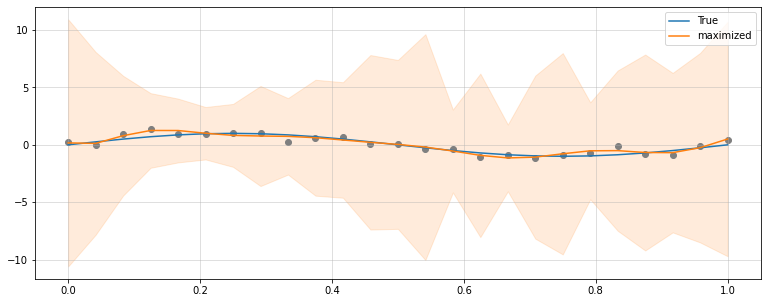

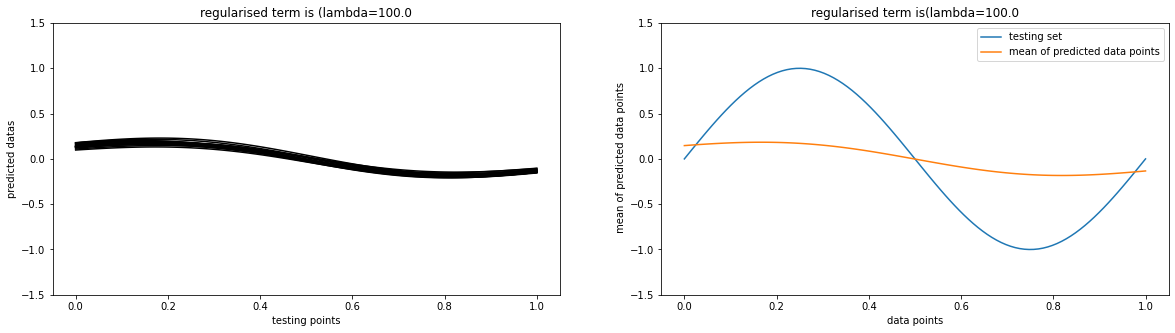

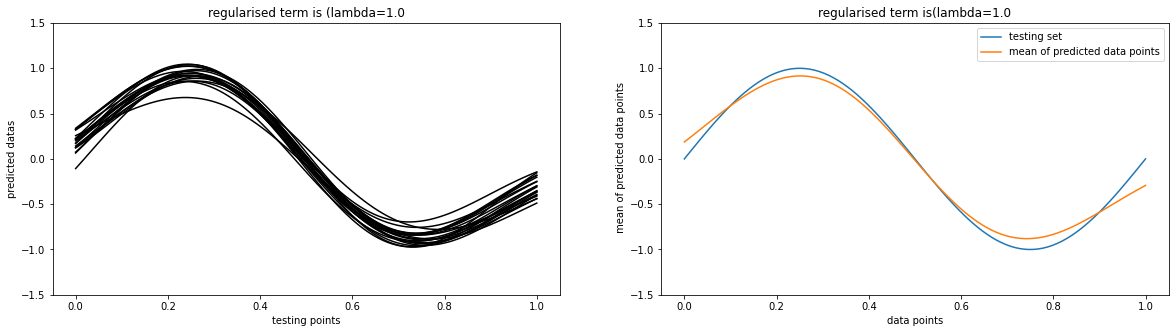

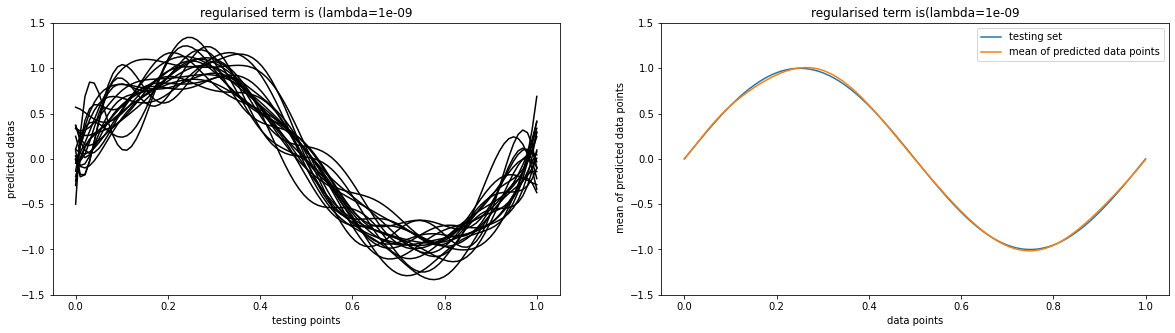

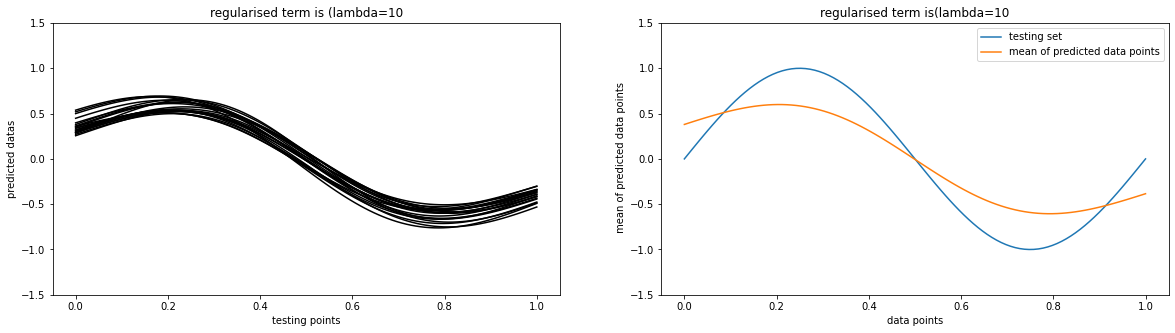

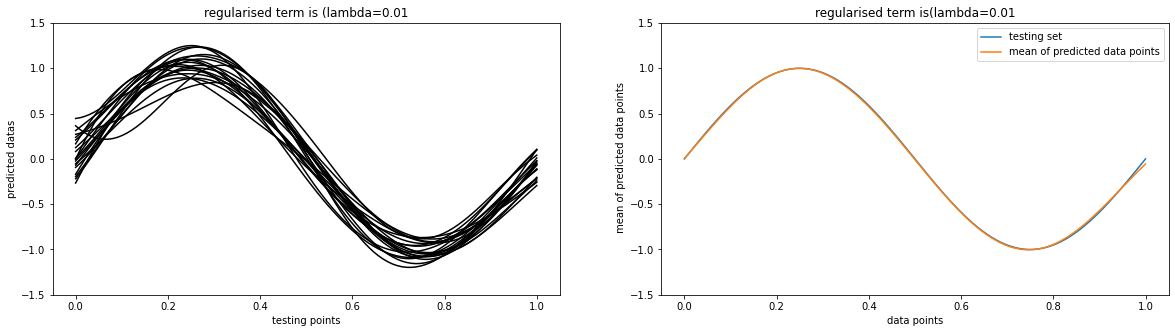

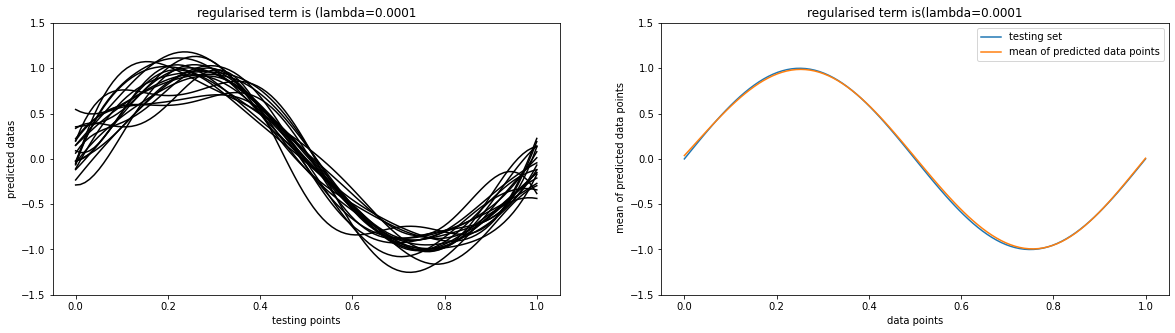

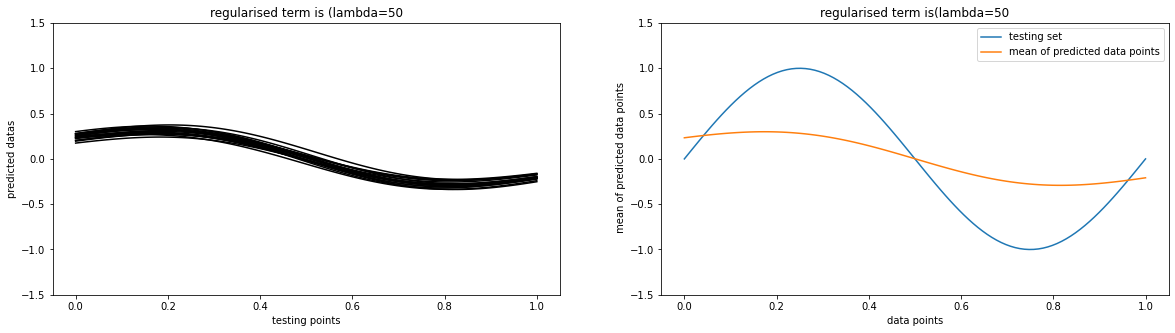

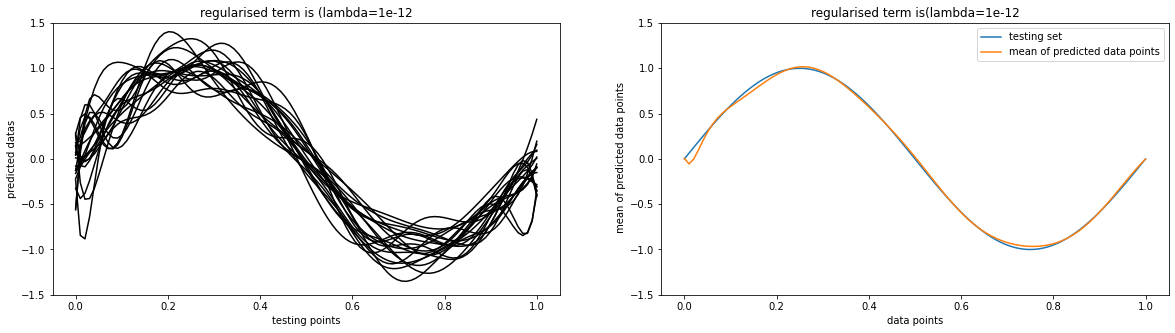

In [ ]:
########################################
#Generate 100 data sets of noisy sinusoidal data
########################################
x_train,y_train=load_data(sinusoidal,25, np.sqrt(0.1),domain=[0, 1])

########################################
#Use regularized least squares to estimate w
########################################
def sigmoid(z): 
  return 1 / (1 + np.exp(-z))

def gaussian_kernel(x, mu, s): return np.exp(-(x - mu)**2 / (2 * s ** 2))

def gaussian_design_matrix(x, mus, s, bias=True):
    
    Phi = gaussian_kernel(x[:, np.newaxis], mus[np.newaxis, :], s)
    if bias:
        r, _ = Phi.shape
        onevect = np.ones(r)
        Phi = np.column_stack((onevect, Phi))
    return Phi

def regularised(X,y,lam=10):
    m,n=X.shape
    I=np.eye((n))
    return (np.linalg.inv(X.T @ X +lam*I)@X.T @y)[:,0]

def posterior(Phi, t, alpha, beta):
    
    SN_inv = alpha + beta * Phi.T @ Phi
    mN = beta * np.linalg.pinv(SN_inv) @ Phi.T @ t[:, np.newaxis]
    return mN, SN_inv

variance=20
precision=1/variance
alpha, beta = 0.01,-0.5
s = 0.2
models = [1, 2, 3, 4, 5, 6, 7, 8,9]
alpha, beta = 0.01, -.5
alpha, beta = 0.01, -.5 #standard prior
M = 25 # gaussian basis functions + bias term
mus = np.linspace(0, 1, M)
Phi = gaussian_design_matrix(x_train, mus, s)
N = Phi.shape[0]

mN, SN_inv = posterior(Phi,y_train, alpha, beta)
##Model selection
x_in = np.linspace(0, 1, 25)
plt.figure(figsize=(13, 5))
phi_x = gaussian_design_matrix(x_in, mus, s, bias=True)
stdev = 1 / beta + np.diag(phi_x @ np.linalg.inv(SN_inv) @ phi_x.T)
mu = (phi_x @ mN).ravel()

plt.plot(x_in, np.sin(2 * np.pi * x_in), label="True")
plt.plot(x_in, mu, label="maximized", c="tab:orange")
plt.fill_between(x_in, mu - 2 * stdev, mu + 2 * stdev, alpha=0.15, color="tab:orange")
plt.scatter(x_train, y_train, c="tab:gray")
plt.grid(alpha=0.5)
plt.legend();

x_test=np.linspace(0,1,100) #100 data points are generated
y_test=sinusoidal(x_test)
for a in [1e2, 1., 1e-9,10,0.01,0.0001,50,1e-12]: #Different lambdas
    y_list = []
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    for i in range(100):
        x_train, y_train = load_data(sinusoidal, 25, 0.25)
        mus=np.linspace(-1,1,25) #M=25
        X_train = gaussian_design_matrix(x_train, mus, s, bias=True)
        X_test = gaussian_design_matrix(x_test, mus, s, bias=True)
        Y = np.c_[y_train] # defining labels
        w1=regularised(X_train,Y,lam=a) #Regularised least squares
        y = X_test.dot(w1) #Prediction
        y_list.append(y)
        if i < 20: #20 is considered for better clearance of datas
            plt.plot(x_test, y, c="black")
    plt.title(f'regularised term is (lambda={a}')
    plt.ylim(-1.5, 1.5)
    plt.xlabel("testing points")
    plt.ylabel("predicted datas")
    #plt.title("testing versus predicted over 20 iterations")
    plt.subplot(1, 2, 2)
    plt.plot(x_test, y_test,label="testing set")
    plt.plot(x_test, np.asarray(y_list).mean(axis=0),label="mean of predicted data points")
    plt.xlabel("data points")
    plt.title(f'regularised term is(lambda={a}')
    plt.ylabel(" mean of predicted data points")
    plt.ylim(-1.5, 1.5)
    plt.legend()
    plt.show()

#Report:
We see that small values of λ allow the model to become finely tuned to the noise on each individual. Conversely, a large value of λ pulls the weight parameters towards zero leading to large bias. Although the bias-variance decomposition may provide some interesting insights into the model complexity issue from a frequentist perspective, it is of limited practical value, because the bias-variance decomposition is based on averages with respect to ensembles of data sets.
So, we can observe regularization reduces the problem of overfitting.

<b> Part - (6) : Understanding MAP estimate  </b>
(a). Generate 100 noisy data points of a sinusoid. Fit a $20^{th}$  order  linear regression  model  with  Gaussian  basis  functions. Starting from a standard normal prior, update the statistics of the posterior density of the parameters using Bayesian sequential updates.

(b). Sample a parameter vector from the posterior distribution, and obtain the curve fit for this realization. Repeat this for several times, and estimate the average of these curve fits, and compare it with the original sinusoid

(c). Use the posterior distribution of the parameters to evaluate the predictive distribution of target $p(t_{0}/x_{0},X,t)$, and plot it for different number of training data points, as discussed in the class.

(d). Report all your observations

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:98: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:98: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:98: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/usr/loca

updated model parameters mean: [[   460.18396843-1.10284377e-22j]
 [ -9249.55684742+1.59025972e-21j]
 [ 17318.57612341-2.32372660e-21j]
 [ -1223.16731039-6.40939368e-22j]
 [-12103.44523715+1.41616139e-21j]
 [ -4098.01155009+1.37378472e-21j]
 [  7724.43812925-2.38814888e-22j]
 [  8466.85534454-1.39642866e-21j]
 [ -1025.79843677-9.34314271e-22j]
 [ -8580.37646432+5.02978777e-22j]
 [ -5731.29665807+1.35077528e-21j]
 [  3535.61211312+7.46463007e-22j]
 [  8339.2723442 -6.14910227e-22j]
 [  3396.06325736-1.30307417e-21j]
 [ -5378.88543512-5.93355924e-22j]
 [ -7870.43003638+7.54613369e-22j]
 [ -1259.82457717+1.33625799e-21j]
 [  6743.65743277+4.79875441e-22j]
 [  6669.0687346 -9.08200800e-22j]
 [ -1559.52086771-1.39559376e-21j]
 [ -7915.93717743-2.33626052e-22j]
 [ -3923.30886014+1.34807862e-21j]
 [  5646.04822986+1.43546250e-21j]
 [  6227.91691966-6.43544507e-22j]
 [ -5711.14767071-2.32577194e-21j]
 [    39.99846587+1.59081253e-21j]]
updated model parameters alpha: [(2.41431933992741e-10+0j)

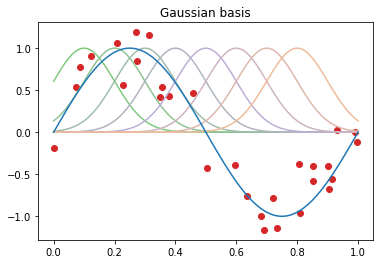

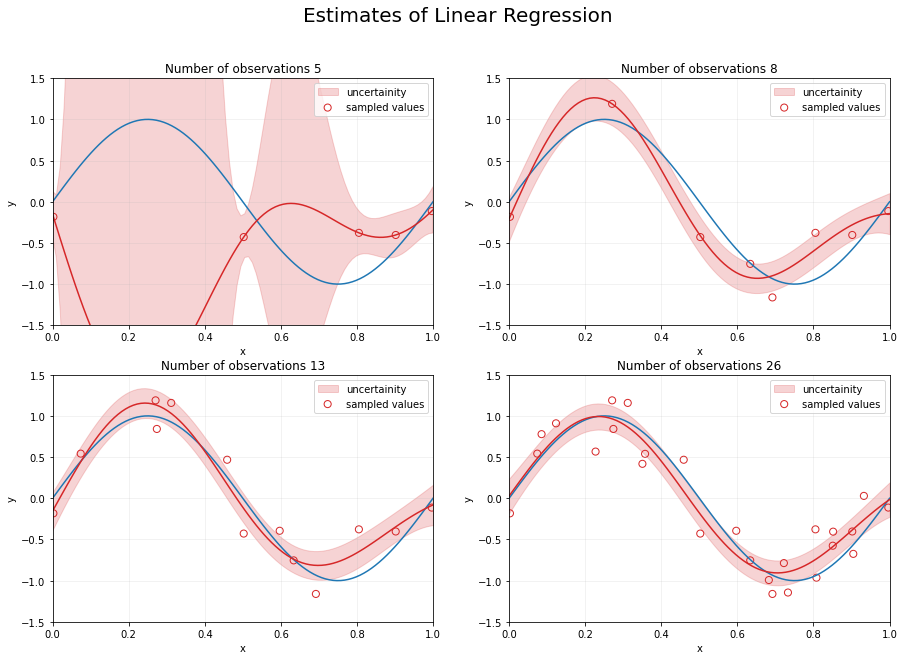

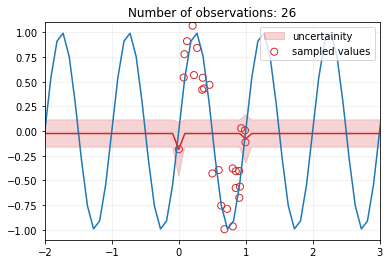

In [ ]:
########################################
#Generate 100 data sets of noisy sinusoidal data
########################################
from numpy.linalg import inv,norm,det,eigvals,pinv
import branca

def f(x): 
  return np.sin(2 * np.pi * x)
def gaussian_kernel(x, mu, s): 
  return np.exp(-(x - mu) ** 2 / (2 * s ** 2))

x_true = np.linspace(0, 1, 100) #100 data points
y_true = f(x_true)

x_train,y_train=load_data(sinusoidal,25, np.sqrt(0.1),domain=[0, 1])

N=25
variance=20
precision=1/variance
alpha, beta = 0.01,-0.5
s = 0.2
models = [1, 2, 3, 4, 5, 6, 7, 8,9]
def gaussian_design_matrix(x, mus, s, bias=True):
    Phi = gaussian_kernel(x[:, np.newaxis], mus[np.newaxis, :], s)
    if bias:
        r, _ = Phi.shape
        onevect = np.ones(r)
        Phi = np.column_stack((onevect, Phi))
    return Phi
def posterior(Phi, t, alpha, beta):
    SN_inv = alpha + beta * Phi.T @ Phi
    mN = beta * pinv(SN_inv) @ Phi.T @ t[:, np.newaxis]
    return mN, SN_inv


alpha, beta = 0.01, -.5 #standard prior
M = 25 # gaussian basis functions + bias term
mus = np.linspace(0, 1, M)
Phi = gaussian_design_matrix(x_train, mus, s)
N = Phi.shape[0]

delta_alpha, delta_beta = float('inf'), float('inf')
tol = 2e-5
alpha_hist, beta_hist = [], []
phi_eigs = eigvals(Phi.T @ Phi)
mN, SN_inv = posterior(Phi,y_train, alpha, beta)

########################################
#Updating statistics of posterior density
########################################

while delta_alpha > tol and delta_beta > tol:
    # Update eigenvalues of the matrix
    lambdas = phi_eigs * beta
    gamma = (lambdas / (lambdas + alpha)).sum()
    # Update model parameters
    mN, SN_inv = posterior(Phi, y_train, alpha, beta)
    # Compute new hyperparams
    new_alpha = gamma / np.asscalar(mN.T @ mN)
    new_beta = (Phi.shape[0] - gamma) / ((y_train[:, np.newaxis] - Phi @ mN) ** 2).sum() 
    # Compute the percentual change in hyperparams
    delta_alpha = np.abs(new_alpha / alpha - 1)
    delta_beta = np.abs(new_beta / beta - 1)
    # Update alpha, beta
    alpha, beta = new_alpha, new_beta
    alpha_hist.append(alpha)
    beta_hist.append(beta)
print("updated model parameters mean:",mN)
print("updated model parameters alpha:",alpha_hist)
print("updated model parameters beta:",beta_hist)
print("updated model parameters SN inverse:",SN_inv)


#Linear basis function of choice
colors = branca.colormap.linear.Accent_03
s = 0.1
mu = np.arange(0.1, 0.9, 0.1)
for j, mu_j in enumerate(mu):
    plt.plot(x_true, gaussian_kernel(x_true, mu_j, s), c=colors(j / len(mu)))
plt.title("Gaussian basis")

########################################
#Sample weight vector from posterior distribution. Estimate the curve, repeat the procedure for 100 times and get the avg fit
########################################
def sample_sinusoidal(S, beta, x_samp=None):
    x_samp = np.random.uniform(0, 1, S)  if x_samp is None else x_samp
    y_samp = np.random.normal(f(x_samp), 1 / np.sqrt(beta), S)
    return x_samp, y_samp


precision = 15
x_s, y_s = sample_sinusoidal(30, precision)

plt.plot(x_true, y_true)
plt.scatter(x_s, y_s, c="tab:red")

def fill_basis(x, s, mu):
    Phi = np.column_stack((gaussian_kernel(x, mu_j, s) for mu_j in mu))
    # bias term
    Phi = np.column_stack((np.ones_like(x), Phi))
    return Phi

def posterior_weights(alpha, s, beta, mus, x_train, y_train):
    Phi = fill_basis(x_train, s, mus)
    SN = inv(alpha + beta * Phi.T @ Phi)
    mN = beta * SN @ Phi.T @ y_train.reshape(-1, 1)
    return mN, SN
#Estimating the Confidence Intervals for the Regression
def posterior(Phi, t, alpha, beta):
    SN_inv = alpha + beta * Phi.T @ Phi
    mN = beta * pinv(SN_inv) @ Phi.T @ t[:, np.newaxis]
    return mN, SN_inv


def plot_estimate(xt, yt, xrange, yrange, mu, sigma, ax=plt):
    ax.plot(xrange, yrange)
    ax.plot(xrange, mu, c="tab:red")
    ax.fill_between(xrange, mu.ravel() - 2 * sigma,
                     mu.ravel() + 2 * sigma,
                     color="tab:red", alpha=0.2,label="uncertainity")
    ax.scatter(xt, yt, facecolors="none", edgecolors="tab:red", s=50,label="sampled values")
    ax.legend()
    ax.grid(alpha=0.2);

step = 0.25
mu = np.arange(0, 1 + step, step) # mus to consider for the Gaussian basis functions
s = 0.3
alpha = 0.1

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
vals = [5, 8, 13, 26]
for axi, v in zip(ax.ravel(), vals):
    xtarget = x_s[:v]
    ytarget = y_s[:v]

    mN, SN = posterior_weights(alpha, s, precision, mu, xtarget,  ytarget)
    Phi = fill_basis(x_true, s, mu).T
    mu_pred = Phi.T @ mN
    sigma_pred = 1 / precision + np.diag(Phi.T @ SN @ Phi)
    
    axi.set_xlim(0, 1)
    axi.set_xlabel("x")
    axi.set_ylabel("y")
    axi.set_ylim(-1.5, 1.5); 
    axi.set_title(f"Number of observations {v}")
    plot_estimate(xtarget, ytarget, x_true, y_true, mu_pred, sigma_pred, ax=axi)
plt.suptitle("Estimates of Linear Regression", size=20);

########################################
#Predictive distribution analysis
########################################
x_true = np.linspace(-4, 5, 100)
y_true = f(x_true)

step = 1
mu = np.arange(0, 1 + step, step) # mus to consider for the Gaussian basis functions
s = 0.01
alpha = 0.1

fig, axi = plt.subplots(1,1)
xtarget = x_s
ytarget = y_s

mN, SN = posterior_weights(alpha, s, precision, mu, xtarget,  ytarget)
Phi = fill_basis(x_true, s, mu).T
mu_pred = Phi.T @ mN
sigma_pred = 1 / precision + np.diag(Phi.T @ SN @ Phi)
print("Predicted mean is:",mu_pred)
print("predicted standard deviation is",sigma_pred)
axi.set_xlim(-2, 3)
axi.set_ylim(-1.1, 1.1); 
axi.set_title(f"Number of observations: {v}")
plot_estimate(xtarget, ytarget, x_true, y_true, mu_pred, sigma_pred, ax=axi)

# Reports and observations
we know that mean of predictive distribution will be the target for the corresponding input data, so plotted mean of predictive distribution for the target against input data points from sinusoidal as data points increses the overfitting is reducing and finally it fits perfectly to the tset data the reason is distribution of weights instead of a point estimation. Again, as the size of the dataset increases the posterior sample variance and the prediction uncertainty decreases. Also, regions with less observations have higher prediction uncertainty.


<center> <h2> <b> Real World Problems </b> </h2> </center>

<b> Part - (1): Blog Feedback prediction  </b>
This data originates from blog posts.  The raw HTML-documents of the blogposts were crawled and processed.  The regression task associated with the data is the prediction of the number of comments in the upcoming 24 hours. Inorder to simulate this situation, we choose a base-time (in the past) and select the blog posts that were published at most 72 hours before the selected basedate/time.  Then, we calculate all the features of the selected blog posts from the  information  that  was  available  at  the  basetime,  therefore  each  instance corresponds to a blog post.  The target is the number of comments that the blog post received in the next 24 hours relative to the base time. <br>
[Link to Dataset](http://archive.ics.uci.edu/ml/datasets/BlogFeedback)


In [ ]:
import pandas as pd
import seaborn as sns

#Functions declaration
    
def closed_form_solution(X,y):
    '''Closed form solution for linear regression'''
    return np.linalg.pinv(X).T@y.T


def polynomial_design_matrix(x, powers, bias=True):
    Phi = np.column_stack((x ** p for p in powers))
    if bias:
        r, _ = Phi.shape
        onevect = np.ones(r)
        Phi = np.column_stack((onevect, Phi))
    return Phi
def with_bias(x,N):
    one_array=np.ones((1,N))
    return np.vstack((one_array,x))
def poly_matrix(x,M):
    if(m==0):
        poly_kernel=np.ones((1,x.shape[1]))
    else:
        poly_kernel=with_bias(x,x.shape[1])
        for i in range(2,M+1):
            poly_kernel=np.vstack((poly_kernel,x**i))
    return poly_kernel

In [ ]:
features=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
        '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
        '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
        '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
        '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
        '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
        '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
        '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
        '90', '91', '92', '93', '94', '95', '96', '97', '98', '99',
        '100', '101', '102', '103', '104', '105', '106', '107', '108',
        '109', '110', '111', '112', '113', '114', '115', '116', '117',
        '118', '119', '120', '121', '122', '123', '124', '125', '126',
        '127', '128', '129', '130', '131', '132', '133', '134', '135',
        '136', '137', '138', '139', '140', '141', '142', '143', '144',
        '145', '146', '147', '148', '149', '150', '151', '152', '153',
        '154', '155', '156', '157', '158', '159', '160', '161', '162',
        '163', '164', '165', '166', '167', '168', '169', '170', '171',
        '172', '173', '174', '175', '176', '177', '178', '179', '180',
        '181', '182', '183', '184', '185', '186', '187', '188', '189',
        '190', '191', '192', '193', '194', '195', '196', '197', '198',
        '199', '200', '201', '202', '203', '204', '205', '206', '207',
        '208', '209', '210', '211', '212', '213', '214', '215', '216',
        '217', '218', '219', '220', '221', '222', '223', '224', '225',
        '226', '227', '228', '229', '230', '231', '232', '233', '234',
        '235', '236', '237', '238', '239', '240', '241', '242', '243',
        '244', '245', '246', '247', '248', '249', '250', '251', '252',
        '253', '254', '255', '256', '257', '258', '259', '260', '261',
        '262', '263', '264', '265', '266', '267', '268', '269', '270',
        '271', '272', '273', '274', '275', '276', '277', '278', '279',
        '280','target']

raw_dataset=pd.read_csv('/content/blogData_train.csv',names=features,na_values="?",sep=",")
dataset = raw_dataset.copy()
print(dataset.shape)

(52397, 281)


In [ ]:
dataset.head(3)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,target
0,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,14.044226,32.615417,0.0,377.0,2.0,34.567566,48.475178,0.0,378.0,12.0,1.479934,46.18691,-356.0,377.0,0.0,1.076167,1.795416,0.0,11.0,0.0,0.400491,1.078097,0.0,9.0,0.0,0.377559,1.07421,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,14.044226,32.615417,0.0,377.0,2.0,34.567566,48.475178,0.0,378.0,12.0,1.479934,46.18691,-356.0,377.0,0.0,1.076167,1.795416,0.0,11.0,0.0,0.400491,1.078097,0.0,9.0,0.0,0.377559,1.07421,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,14.044226,32.615417,0.0,377.0,2.0,34.567566,48.475178,0.0,378.0,12.0,1.479934,46.18691,-356.0,377.0,0.0,1.076167,1.795416,0.0,11.0,0.0,0.400491,1.078097,0.0,9.0,0.0,0.377559,1.07421,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Checking the presence of NA values and dropping them
dataset.isna().sum()

1         0
2         0
3         0
4         0
5         0
         ..
277       0
278       0
279       0
280       0
target    0
Length: 281, dtype: int64

In [ ]:
dataset=dataset.dropna() #dropping NA values
correlation_mat=dataset.corr() #FINDING CORRELATION
correlation_mat.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,target
count,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,0.0,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,0.0,277.000000,277.000000,277.000000,277.000000,0.0,277.000000,277.000000,...,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,0.0,277.000000,277.000000,277.000000
mean,0.133759,0.132529,0.018122,0.122295,0.126265,0.132342,0.131561,0.013787,0.107886,0.117395,0.133034,0.132242,NaN,0.107941,0.115672,0.133654,0.128670,0.018122,0.111401,0.125657,0.114457,0.132042,-0.094950,0.107707,-0.027009,0.108806,0.090185,0.013297,0.072057,0.111317,0.110119,0.096624,NaN,0.066844,0.105384,0.109990,0.096949,NaN,0.066898,0.011394,...,0.036541,0.200968,0.153875,0.033844,0.087207,0.052095,0.072129,0.033920,0.200968,0.029973,0.037856,0.129787,0.040658,0.038080,0.114570,0.042271,0.046312,0.043404,0.042852,0.039471,0.103637,-0.001129,-0.000223,0.000022,-0.000094,0.001312,0.001036,-0.001203,0.001590,0.000644,0.003267,-0.001569,-0.000163,-0.002168,-0.002729,0.004183,NaN,0.008273,0.008368,0.067746
std,0.274055,0.272649,0.102704,0.255896,0.257884,0.274276,0.277951,0.091564,0.249345,0.247112,0.274715,0.278830,NaN,0.249335,0.240696,0.273496,0.264134,0.102704,0.241670,0.258042,0.246785,0.278910,0.229839,0.248002,0.082817,0.275546,0.266871,0.093554,0.258128,0.260068,0.277206,0.271664,NaN,0.252751,0.235370,0.277498,0.272245,NaN,0.252775,0.078181,...,0.068582,0.300804,0.231615,0.065906,0.144411,0.086389,0.102041,0.068616,0.300804,0.067542,0.065966,0.196494,0.067163,0.071999,0.174808,0.075410,0.078897,0.072658,0.076333,0.064797,0.159279,0.071952,0.071981,0.071989,0.071906,0.071958,0.071907,0.072018,0.073896,0.073139,0.072770,0.072788,0.073614,0.070275,0.069970,0.061394,NaN,0.081037,0.080944,0.146357
min,-0.721287,-0.823586,-0.060933,-0.892489,-0.619366,-0.692541,-0.838444,-0.215008,-0.970233,-0.481833,-0.712583,-0.831996,NaN,-0.970727,-0.488433,-0.748403,-0.845815,-0.060933,-0.914384,-0.631960,-0.480476,-0.835565,-0.970727,-0.968491,-0.327167,-0.749421,-0.900023,-0.045609,-0.956948,-0.616351,-0.761690,-0.876211,NaN,-0.991953,-0.441117,-0.759145,-0.875718,NaN,-0.992312,-0.012516,...,-0.060816,-0.007280,-0.005087,-0.040731,-0.218695,-0.074545,-0.074466,-0.019405,-0.007280,-0.042684,-0.004598,-0.011511,-0.018507,-0.069073,-0.011054,-0.089202,-0.018538,-0.018428,-0.019807,-0.021391,-0.007986,-0.163035,-0.164557,-0.179715,-0.199793,-0.199793,-0.197148,-0.179239,-0.197874,-0.204088,-0.204088,-0.200098,-0.194336,-0.148303,-0.142048,-0.028629,NaN,-0.028277,-0.020524,-0.280792
25%,0.006433,0.008919,-0.004017,0.008304,0.006440,0.005436,0.005898,-0.001686,0.003008,0.002584,0.006188,0.006214,NaN,0.002995,0.003456,0.007173,0.008947,-0.004017,0.007303,0.006361,0.000849,0.005408,-0.044817,0.003055,-0.043690,-0.010279,-0.018999,-0.002667,-0.028833,-0.005880,-0.009939,-0.017489,NaN,-0.033553,-0.002948,-0.010124,-0.017225,NaN,-0.033665,-0.002911,...,0.006602,0.007884,0.005059,0.007970,0.008814,0.012561,0.016609,0.005538,0.007884,0.001062,0.011995,0.005564,0.015378,0.009721,0.003891,0.012841,0.005969,0.004228,0.005795,0.016053,0.003476,-0.004237,-0.004183,-0.003498,-0.003888,-0.001779,-0.002287,-0.003937,-0.004153,-0.00543

In [ ]:
#FEATURE EXTRACTION 

#Selecting only those features which have correlation value greater than or equal to 0.4
cor_target=correlation_mat['target']
cor_target=cor_target[cor_target>=0.4]
cor_target[cor_target>=0.4]

1         0.485464
2         0.424616
5         0.491707
6         0.497631
7         0.433578
10        0.506540
11        0.490111
12        0.439152
15        0.489674
16        0.471999
20        0.486316
21        0.503375
22        0.440003
35        0.461627
52        0.472061
target    1.000000
Name: target, dtype: float64

In [ ]:
drop_list=['3', '4', '8', '9', 
        '13', '14', '17', '18', '19', '23',
        '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
        '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
        '46', '47', '48', '49', '50', '51','53', '54', '55', '56',
        '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
        '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
        '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
        '90', '91', '92', '93', '94', '95', '96', '97', '98', '99',
        '100', '101', '102', '103', '104', '105', '106', '107', '108',
        '109', '110', '111', '112', '113', '114', '115', '116', '117',
        '118', '119', '120', '121', '122', '123', '124', '125', '126',
        '127', '128', '129', '130', '131', '132', '133', '134', '135',
        '136', '137', '138', '139', '140', '141', '142', '143', '144',
        '145', '146', '147', '148', '149', '150', '151', '152', '153',
        '154', '155', '156', '157', '158', '159', '160', '161', '162',
        '163', '164', '165', '166', '167', '168', '169', '170', '171',
        '172', '173', '174', '175', '176', '177', '178', '179', '180',
        '181', '182', '183', '184', '185', '186', '187', '188', '189',
        '190', '191', '192', '193', '194', '195', '196', '197', '198',
        '199', '200', '201', '202', '203', '204', '205', '206', '207',
        '208', '209', '210', '211', '212', '213', '214', '215', '216',
        '217', '218', '219', '220', '221', '222', '223', '224', '225',
        '226', '227', '228', '229', '230', '231', '232', '233', '234',
        '235', '236', '237', '238', '239', '240', '241', '242', '243',
        '244', '245', '246', '247', '248', '249', '250', '251', '252',
        '253', '254', '255', '256', '257', '258', '259', '260', '261',
        '262', '263', '264', '265', '266', '267', '268', '269', '270',
        '271', '272', '273', '274', '275', '276', '277', '278', '279',
        '280']

modified_dataset=dataset.drop(drop_list,axis=1)
#modified_dataset.head()
modified_dataset.shape

(52397, 16)

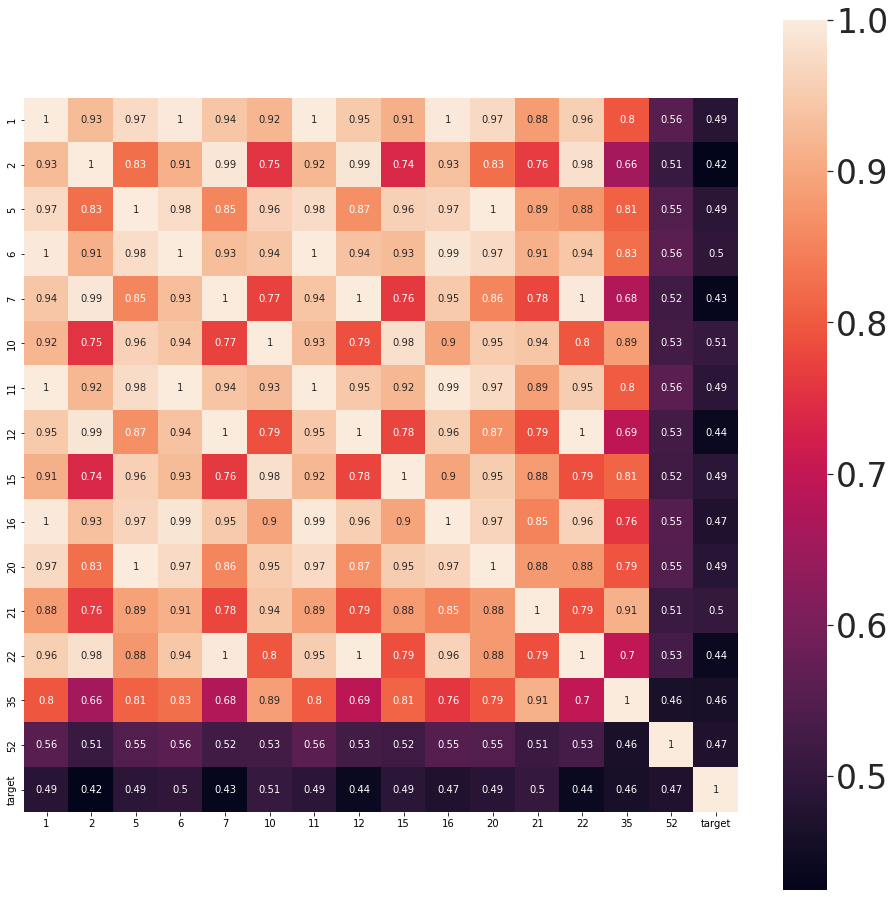

In [ ]:
fig=plt.subplots(figsize=(16,16))
sns.set(font_scale=3)
sns.heatmap(modified_dataset.corr(),square=True,cbar=True,annot=True,annot_kws={'size': 10})

blog Predictions with split factor =0.2 [8.50062029e+00 8.50062029e+00 8.50062029e+00 ... 7.73333502e-42
 7.73333502e-42 7.73333502e-42]
Minimum error occurs for M = 5 and its values is  24.28492502133362


Text(0, 0.5, 'rms')

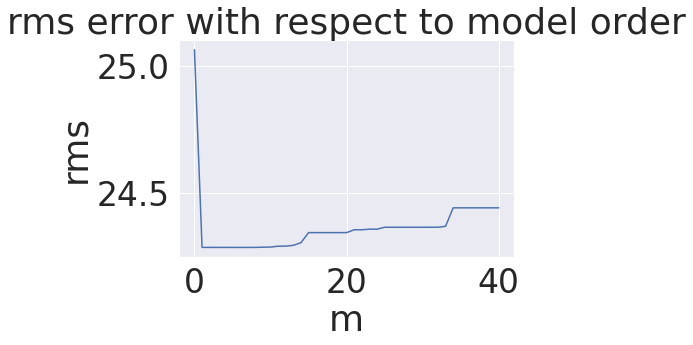

In [ ]:
#Linear Regression with splitting factor =0.2 ,with only considering greater than 0.4 values
data=modified_dataset.to_numpy()
x=data[:,0:14].T
x=x.astype(float)
t=data[:,15].T
t=t.astype(float)

p=0.2
Xtr=x[:,0:int(p*x.shape[1])]
Ytr=t[0:int(p*x.shape[1])]

M=40
err=np.array([])
pred=[]
for m in range(M+1):
    phi=poly_matrix(Xtr,m)
    weight_vector=closed_form_solution(phi,Ytr)
    y=weight_vector.T@phi
    pred=np.append(pred,y)
    err=np.append(err,np.sqrt(sum(((y-Ytr)**2))/(len(y))))
print("blog Predictions with split factor =0.2",pred)
m_value=np.argmin(err)
min_err=err[m_value]
print("Minimum error occurs for M =",m_value,"and its values is ",min_err)
plt.figure()
plt.plot(err)
plt.title("rms error with respect to model order")
plt.xlabel("m")
plt.ylabel("rms")

Minimum error occurs for M = 3 and its values is  20.81194501383699


Text(0, 0.5, 'rms')

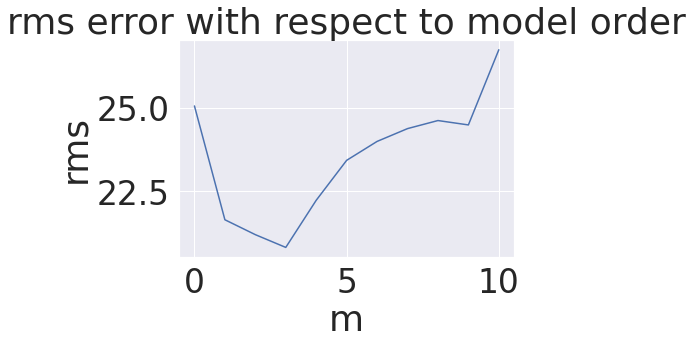

In [ ]:
#Linear Regression with splitting factor =0.2,all data sets
data=dataset.to_numpy()
x=data[:,0:279].T
x=x.astype(float)
t=data[:,280].T
t=t.astype(float)

p=0.2
Xtr=x[:,0:int(p*x.shape[1])]
Ytr=t[0:int(p*x.shape[1])]
M=10
err=np.array([])
for m in range(M+1):
    phi=poly_matrix(Xtr,m)
    weight_vector=closed_form_solution(phi,Ytr)
    y=weight_vector.T@phi
    
    err=np.append(err,np.sqrt(sum(((y-Ytr)**2))/(len(y))))

m_value=np.argmin(err)
min_err=err[m_value]
print("Minimum error occurs for M =",m_value,"and its values is ",min_err)
plt.figure()
plt.plot(err)
plt.title("rms error with respect to model order")
plt.xlabel("m")
plt.ylabel("rms")

Minimum error occurs for M = 5 and its values is  9.521136873809857


Text(0, 0.5, 'rms')

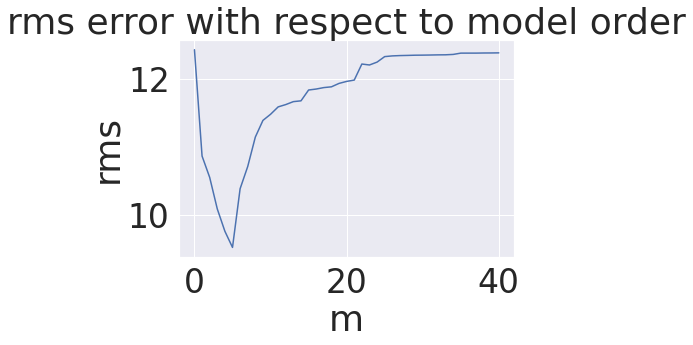

In [ ]:
#Linear Regression with splitting factor =0.02
data=dataset.to_numpy()
x=data[:,0:279].T
x=x.astype(float)
t=data[:,280].T
t=t.astype(float)

p=0.02 #SPLIT FACTOR
Xtr=x[:,0:int(p*x.shape[1])]
Ytr=t[0:int(p*x.shape[1])]
M=40
err=np.array([])
for m in range(M+1):
    phi=poly_matrix(Xtr,m)
    weight_vector=closed_form_solution(phi,Ytr)
    y=weight_vector.T@phi
    
    err=np.append(err,np.sqrt(sum(((y-Ytr)**2))/(len(y))))

m_value=np.argmin(err)
min_err=err[m_value]
print("Minimum error occurs for M =",m_value,"and its values is ",min_err)
plt.figure()
plt.plot(err)
plt.title("rms error with respect to model order")
plt.xlabel("m")
plt.ylabel("rms")

Minimum error occurs for M = 5 and its values is  9.521136873809857


Text(0, 0.5, 'rms')

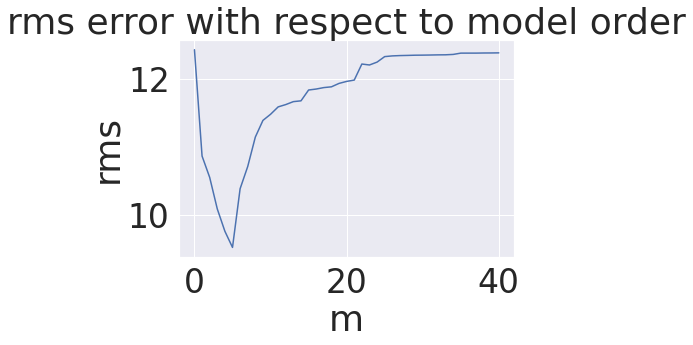

In [ ]:
#Linear Regression with splitting factor =0.001
data=dataset.to_numpy()
x=data[:,0:279].T
x=x.astype(float)
t=data[:,280].T
t=t.astype(float)

p=0.02
Xtr=x[:,0:int(p*x.shape[1])]
Ytr=t[0:int(p*x.shape[1])]
M=40
err=np.array([])
for m in range(M+1):
    phi=poly_matrix(Xtr,m)
    weight_vector=closed_form_solution(phi,Ytr)
    y=weight_vector.T@phi
    
    err=np.append(err,np.sqrt(sum(((y-Ytr)**2))/(len(y))))

m_value=np.argmin(err)
min_err=err[m_value]
print("Minimum error occurs for M =",m_value,"and its values is ",min_err)
plt.figure()
plt.plot(err)
plt.title("rms error with respect to model order")
plt.xlabel("m")
plt.ylabel("rms")

blog predicted value is given by [ 5.09615385e+00  5.09615385e+00  5.09615385e+00  5.09615385e+00
  5.09615385e+00  5.09615385e+00  5.09615385e+00  5.09615385e+00
  5.09615385e+00  5.09615385e+00  5.09615385e+00  5.09615385e+00
  5.09615385e+00  5.09615385e+00  5.09615385e+00  5.09615385e+00
  5.09615385e+00  5.09615385e+00  5.09615385e+00  5.09615385e+00
  5.09615385e+00  5.09615385e+00  5.09615385e+00  5.09615385e+00
  5.09615385e+00  5.09615385e+00  5.09615385e+00  5.09615385e+00
  5.09615385e+00  5.09615385e+00  5.09615385e+00  5.09615385e+00
  5.09615385e+00  5.09615385e+00  5.09615385e+00  5.09615385e+00
  5.09615385e+00  5.09615385e+00  5.09615385e+00  5.09615385e+00
  5.09615385e+00  5.09615385e+00  5.09615385e+00  5.09615385e+00
  5.09615385e+00  5.09615385e+00  5.09615385e+00  5.09615385e+00
  5.09615385e+00  5.09615385e+00  5.09615385e+00  5.09615385e+00
  4.53060996e+00 -3.98941193e+00 -3.98941193e+00  4.53060996e+00
  1.06672465e+01  2.16864107e+00  2.16864107e+00  1.06672

Text(0, 0.5, 'rms')

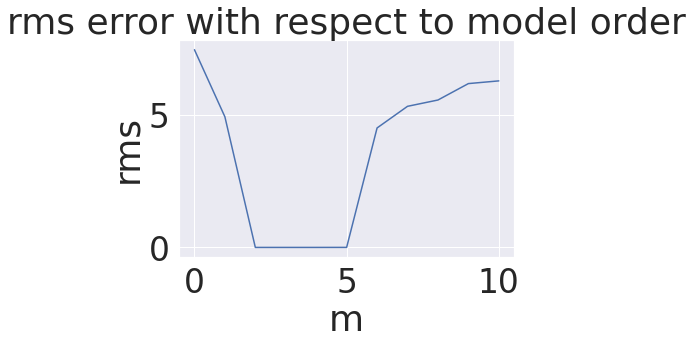

In [ ]:
#Linear Regression with splitting factor =0.001
data=dataset.to_numpy()
x=data[:,0:279].T
x=x.astype(float)
t=data[:,280].T
t=t.astype(float)

p=0.001
Xtr=x[:,0:int(p*x.shape[1])]
Ytr=t[0:int(p*x.shape[1])]
M=10
err=np.array([])
pred=[]
for m in range(M+1):
    phi=poly_matrix(Xtr,m)
    weight_vector=closed_form_solution(phi,Ytr)
    y=weight_vector.T@phi
    pred=np.append(pred,y)
    err=np.append(err,np.sqrt(sum(((y-Ytr)**2))/(len(y))))

print("blog predicted value is given by",pred)
m_value=np.argmin(err)
min_err=err[m_value]
print("Minimum error occurs for M =",m_value,"and its values is ",min_err)
plt.figure()
plt.plot(err)
plt.title("rms error with respect to model order")
plt.xlabel("m")
plt.ylabel("rms")


#ERROR IS MINIMUM HERE,SO THIS MODEL IS BEST WITH ALL DATA POINTS

<b> Part - (2): Breast Cancer Wisconsin (Prognostic) Data Set </b>
Predict the recurrence time/disease-free time of the breast cancer patients from the first 30 features computed from a digitized image of a fine needle aspirate(FNA) of a breast mass. <br>
[Link to Dataset](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Prognostic%29)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def closed_form_solution(X,y):
    '''Closed form solution for linear regression'''
    return np.linalg.pinv(X).T@y.T


def polynomial_design_matrix(x, powers, bias=True):
    Phi = np.column_stack((x ** p for p in powers))
    if bias:
        r, _ = Phi.shape
        onevect = np.ones(r)
        Phi = np.column_stack((onevect, Phi))
    return Phi
def with_bias(x,N):
    one_array=np.ones((1,N))
    return np.vstack((one_array,x))
def poly_matrix(x,M):
    if(m==0):
        poly_kernel=np.ones((1,x.shape[1]))
    else:
        poly_kernel=with_bias(x,x.shape[1])
        for i in range(2,M+1):
            poly_kernel=np.vstack((poly_kernel,x**i))
    return poly_kernel

column_names = ['ID','Outcome','Time', 'Radius Mean', 'Texture Mean', 'Perimeter Mean',
       'Area Mean', 'Smoothness Mean', 'Compactness Mean', 'Concavity Mean',
       'Concave Points Mean', 'Symmetry Mean', 'Fractal Dimension Mean',
       'Radius SE', 'Texture SE', 'Perimeter SE', 'Area SE', 'Smoothness SE',
       'Compactness SE', 'Concavity SE', 'Concave Points SE', 'Symmetry SE',
       'Fractal Dimension SE', 'Radius Worst', 'Texture Worst',
       'Perimeter Worst', 'Area Worst', 'Smoothness Worst',
       'Compactness Worst', 'Concavity Worst', 'Concave Points Worst',
       'Symmetry Worst', 'Fractal Dimension Worst', 'Tumor Size', 'Lymph Node Status']

raw_dataset=pd.read_csv('/content/wpbc.data',names=column_names,na_values="?",sep=",")
dataset = raw_dataset.copy()
dataset

,ID,Outcome,Time,Radius Mean,Texture Mean,Perimeter Mean,Area Mean,Smoothness Mean,Compactness Mean,Concavity Mean,Concave Points Mean,Symmetry Mean,Fractal Dimension Mean,Radius SE,Texture SE,Perimeter SE,Area SE,Smoothness SE,Compactness SE,Concavity SE,Concave Points SE,Symmetry SE,Fractal Dimension SE,Radius Worst,Texture Worst,Perimeter Worst,Area Worst,Smoothness Worst,Compactness Worst,Concavity Worst,Concave Points Worst,Symmetry Worst,Fractal Dimension Worst,Tumor Size,Lymph Node Status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,0.1865,0.06333,0.6249,1.8900,3.972,71.55,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,21.63,37.08,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5.0
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2.0
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0.0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0.0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,942640,N,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,0.06367,0.1728,0.05262,1.3740,2.3120,9.938,192.40,0.004422,0.02679,0.02433,0.020360,0.02486,0.003922,24.67,24.81,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2.0
194,943471,N,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,0.06500,0.1735,0.06105,0.3235,1.8390,1.971,32.61,0.006178,0.02088,0.02834,0.010790,0.02122,0.003168,17.34,41.48,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0.0
195,94547,N,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,0.05068,0.1793,0.05392,0.6101,1.4250,3.827,63.02,0.006890,0.01556,0.03155,0.009714,0.02734,0.001377,20.76,36.66,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0.0
196,947204,R,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,0.13180,0.1884,0.06472,1.0850,0.8469,8.308,142.50,0.006831,0.03541,0.04948,0.017700,0.01481,0.003979,28.34,27.98,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,NaN


In [ ]:
#Checking the presence of NA values and dropping them
dataset.isna().sum()
dataset=dataset.dropna()

#Selecting the data rows in which disease has recurred

dataset=dataset[dataset['Outcome']=='R']
dataset[dataset['Outcome']=='R']

#Dropping the columns ID and Outcome as they do not add any value to model
dataset = dataset.drop('Outcome', 1)
dataset = dataset.drop('ID', 1)

baseline_dataset = dataset
baseline_dataset = baseline_dataset.drop('Time', axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if sys.path[0] == '':


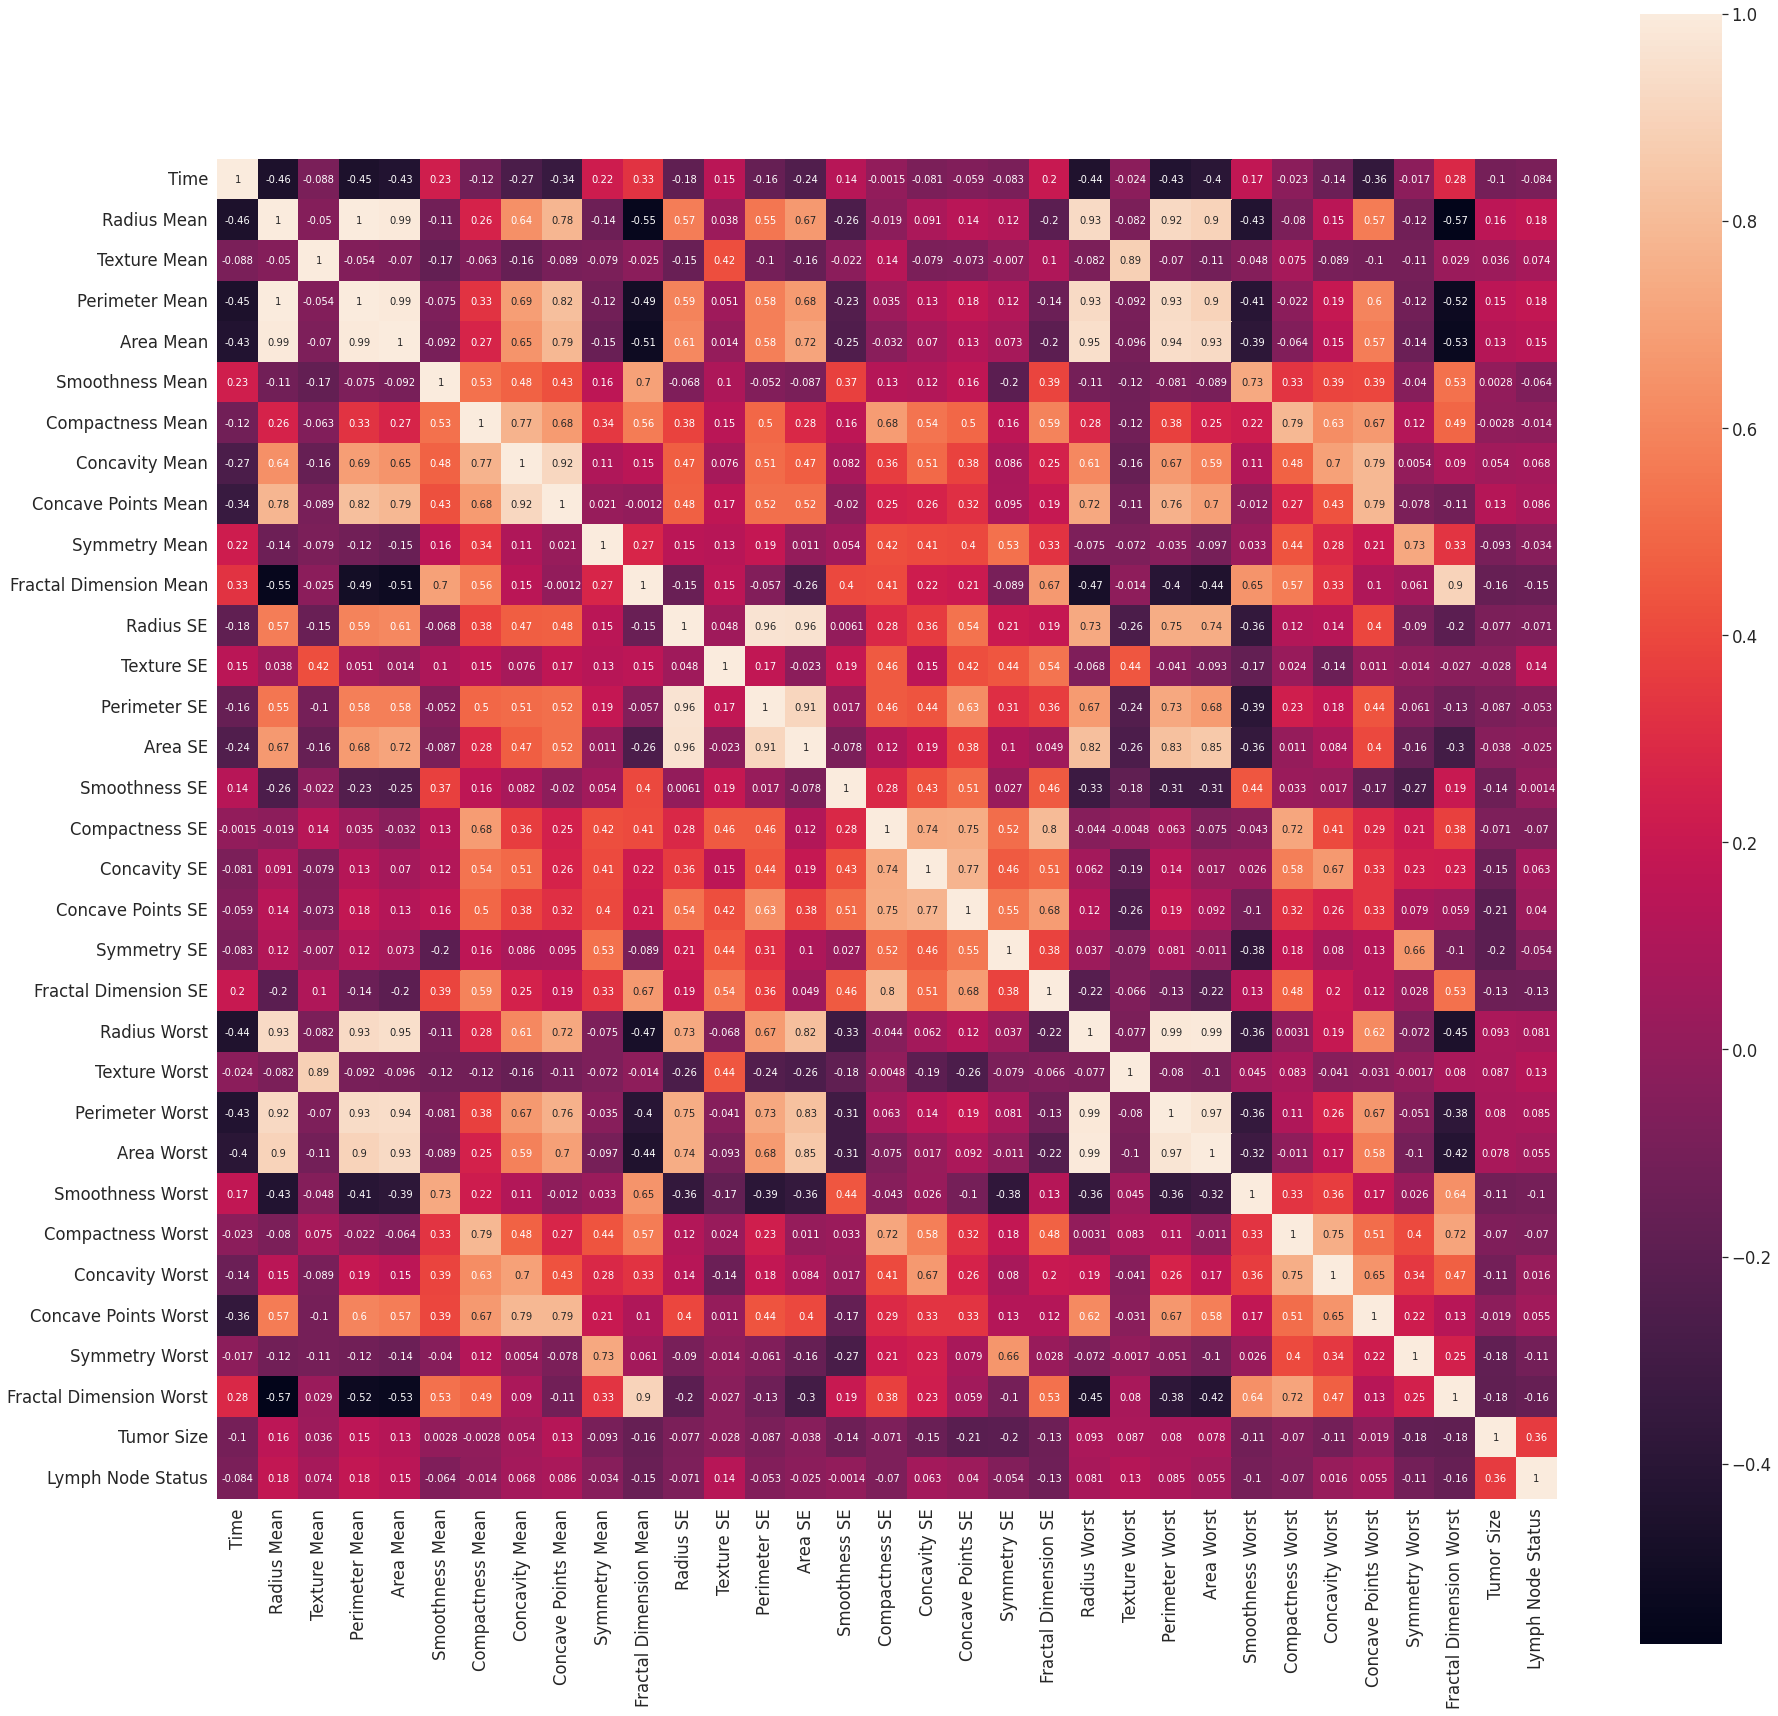

In [ ]:
#To check correlation between attributes we can visualize it from heat map
#lighter ones => high correlation
#darker ones => lower correlation
fig = plt.subplots(figsize = (30, 30))
sns.set(font_scale=1.5)
sns.heatmap(dataset.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
#Strong correlation is between radius mean and area mean

In [ ]:
dataset.describe()  #Descriptive stats for each variable

,Time,Radius Mean,Texture Mean,Perimeter Mean,Area Mean,Smoothness Mean,Compactness Mean,Concavity Mean,Concave Points Mean,Symmetry Mean,Fractal Dimension Mean,Radius SE,Texture SE,Perimeter SE,Area SE,Smoothness SE,Compactness SE,Concavity SE,Concave Points SE,Symmetry SE,Fractal Dimension SE,Radius Worst,Texture Worst,Perimeter Worst,Area Worst,Smoothness Worst,Compactness Worst,Concavity Worst,Concave Points Worst,Symmetry Worst,Fractal Dimension Worst,Tumor Size,Lymph Node Status
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,25.565217,18.330870,21.758913,121.095217,1081.980435,0.103063,0.141606,0.161542,0.093113,0.187848,0.061176,0.667943,1.200233,4.734978,81.965435,0.006477,0.030801,0.038258,0.014383,0.019904,0.003836,22.670435,29.623913,151.332609,1635.767391,0.145341,0.357509,0.440004,0.183985,0.314017,0.088717,3.471739,4.869565
std,22.727030,3.365566,3.695717,22.910195,397.264721,0.010302,0.040692,0.062138,0.034361,0.021085,0.006298,0.303290,0.426360,2.213389,53.357871,0.001995,0.017501,0.016074,0.003944,0.009174,0.001736,4.703678,5.555203,32.417293,703.147215,0.019605,0.130614,0.147636,0.037977,0.061458,0.016784,2.029851,6.017045
min,1.000000,12.340000,14.340000,81.150000,477.400000,0.082170,0.067220,0.052530,0.033340,0.142400,0.050250,0.220800,0.362100,1.602000,18.850000,0.003978,0.008422,0.016030,0.007299,0.009783,0.001526,15.510000,16.670000,101.700000,733.200000,0.102100,0.120200,0.224900,0.118500,0.229300,0.060910,0.400000,0.000000
25%,9.000000,15.657500,19.067500,103.900000,799.875000,0.094077,0.113375,0.111025,0.067740,0.172175,0.056365,0.427400,0.965225,2.945000,46.805000,0.004739,0.019820,0.023867,0.011505,0.014940,0.002701,19.542500,26.105000,128.300000,1144.250000,0.129775,0.261950,0.323700,0.152850,0.269150,0.076930,2.350000,0.250000
50%,16.500000,18.825000,21.365000,123.550000,1090.000000,0.103350,0.133350,0.164700,0.088235,0.185750,0.060795,0.625750,1.185500,4.298000,67.700000,0.006293,0.027075,0.037500,0.014595,0.017365,0.003460,21.890000,29.470000,145.700000,1481.000000,0.146800,0.352650,0.404900,0.183400,0.304950,0.086945,3.000000,2.000000
75%,36.750000,20.262500,24.162500,133.425000,1278.500000,0.111875,0.166000,0.207525,0.108375,0.198900,0.065240,0.826000,1.369250,5.735750,101.142500,0.007717,0.038780,0.046187,0.016833,0.020975,0.004943,24.870000,33.090000,170.850000,1905.500000,0.160725,0.409550,0.533200,0.208500,0.340700,0.100198,4.000000,7.000000
max,78.000000,27.220000,30.990000,182.100000,2250.000000,0.121500,0.236300,0.336800,0.191300,0.235600,0.074510,1.730000,2.910000,11.560000,316.000000,0.011900,0.100600,0.097230,0.026380,0.053330,0.010390,35.130000,40.140000,232.200000,3903.000000,0.185100,0.744400,0.734500,0.275600,0.488200,0.134100,10.000000,27.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


[[82.0406799 ]
 [-3.08089381]]
92
184
276
368
460
552
644
736
828
920
Minimum error occurs for M = 14 and its values is  130.65155631453086


<Figure size 432x288 with 0 Axes>

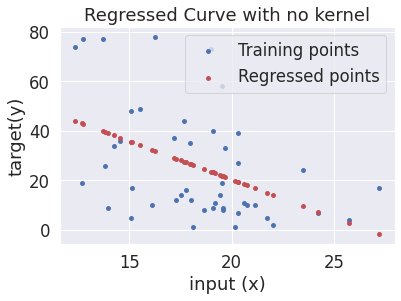

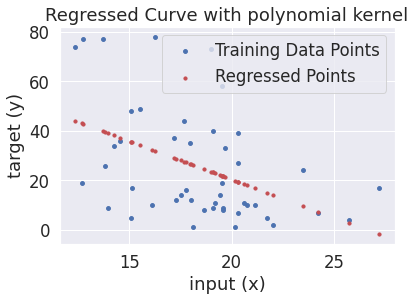

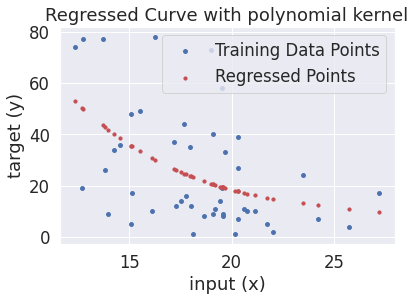

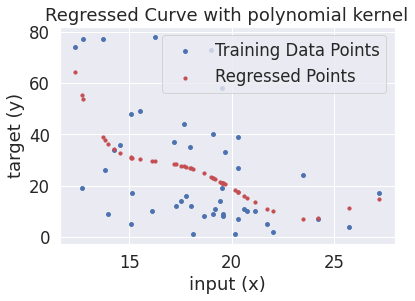

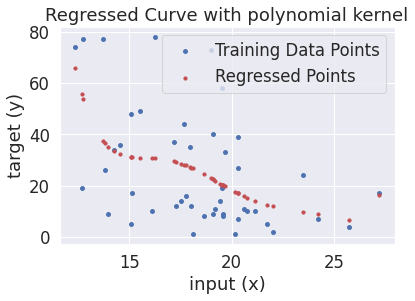

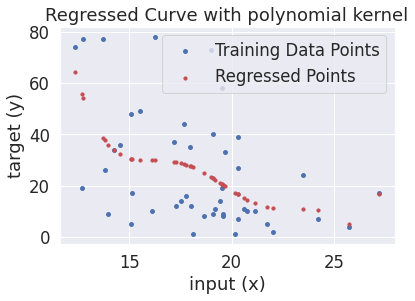

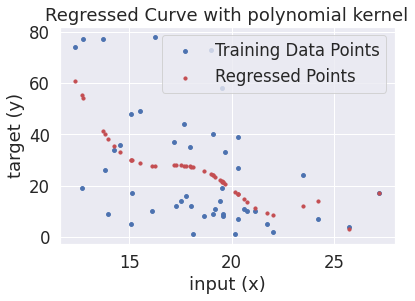

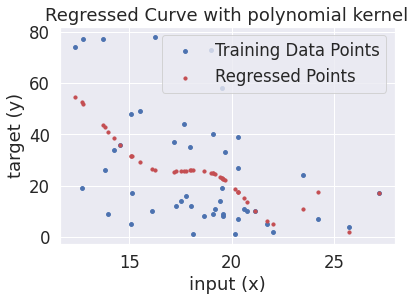

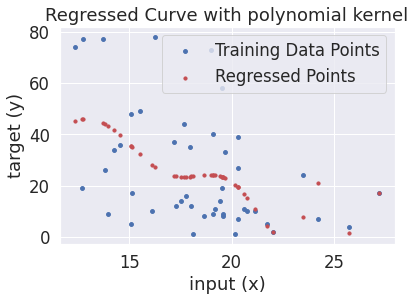

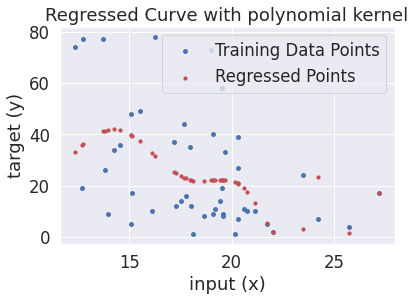

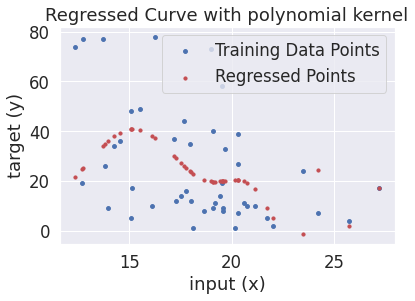

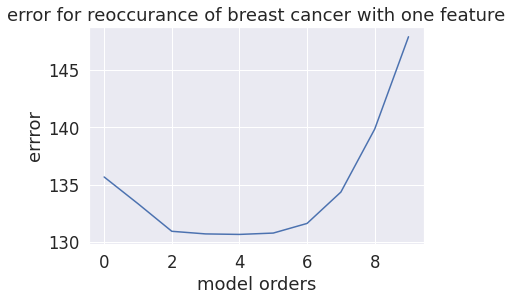

In [ ]:
#Trying to estimate time by considering only single highly correlated attribute. for eg radius mean
#One attribute i.e one feature
single_attribute_dataset = dataset[['Radius Mean']]

x=single_attribute_dataset.to_numpy().T
t=dataset[['Time']].to_numpy().T
t=t.astype(np.float)

N=x.shape[1]
X=with_bias(x,N)
weight_vector=closed_form_solution(X,t)
print(weight_vector)

#linear regression (no kernel)
plt.figure()
y=weight_vector.T@X #Prediction
plt.figure()
plt.scatter(x,t,15,label='Training points')
plt.scatter(x,y,15,c='r',label='Regressed points')
plt.xlabel("input (x)")
plt.ylabel("target(y)")
plt.legend()
plt.title("Regressed Curve with no kernel")

#linear regression (polynomial kernel)
M=20
rms=np.array([])
M=20
for m in range(1,M+1,2):
    phi=poly_matrix(x,m)
    print(phi.size)
    weight_vector=closed_form_solution(phi,t)
    y=weight_vector.T@phi
    rms=np.append(rms,np.sqrt(sum(((y-t)**2).flatten())/(len(y))))


    #Plotting the regressed target points calculated using training data
    xpoints=np.reshape(np.linspace(0,1,500),(1,500))
    phi_points=poly_matrix(xpoints,m)
    
    plt.figure()
    plt.scatter(x,t,15,label='Training Data Points')
    #plt.scatter(xpoints,(weight_vector.T@phi_points),1,c='r',label='Regressed Points')
    plt.scatter(x,y,10,c='r',label='Regressed Points')
    plt.xlabel("input (x)")
    plt.ylabel("target (y)")
    plt.legend()
    plt.title("Regressed Curve with polynomial kernel")
    plt.grid(True)

#Model order for which error is minimum
m_value=np.argmin(rms)
min_err=rms[m_value]
print("Minimum error occurs for M =",m_value+10,"and its values is ",min_err)
plt.figure()
plt.plot(rms)
plt.xlabel("model orders")
plt.ylabel("errror")
plt.title("error for reoccurance of breast cancer with one feature")
plt.show()

In [ ]:
#Multiple Attributes ,from heatmap
drop_list = ['Texture Mean', 'Perimeter Mean', 'Area Mean','Compactness Mean', 'Smoothness Mean', 'Concavity Mean', 'Symmetry Mean',
             'Radius SE','Perimeter SE', 'Area SE', 'Texture SE', 'Compactness SE', 'Smoothness SE', 'Concavity SE', 'Concave Points SE', 'Fractal Dimension SE', 'Symmetry SE',
             'Area Worst','Perimeter Worst','Compactness Worst', 'Concavity Worst', 'Fractal Dimension Worst', 'Symmetry Worst',
             'Concave Points Worst','Texture Worst','Lymph Node Status', 'Tumor Size']
multiple_attribute_dataset = dataset.drop(drop_list,axis = 1 )
multiple_attribute_dataset.head()

,Time,Radius Mean,Concave Points Mean,Fractal Dimension Mean,Radius Worst,Smoothness Worst
4,27,20.29,0.10430,0.05883,22.54,0.1374
5,77,12.75,0.07666,0.07164,15.51,0.1706
7,77,13.71,0.05985,0.07451,17.06,0.1654
13,36,14.54,0.07364,0.07077,17.46,0.1678
15,10,16.13,0.10280,0.07356,20.96,0.1789


In [ ]:
#attributes=2
drop_list=['Fractal Dimension Mean','Radius Worst','Smoothness Worst']
two_attribute_dataset=multiple_attribute_dataset.drop(drop_list,axis=1)
two_attribute_dataset.head()

,Time,Radius Mean,Concave Points Mean
4,27,20.29,0.10430
5,77,12.75,0.07666
7,77,13.71,0.05985
13,36,14.54,0.07364
15,10,16.13,0.10280


Minimum error occurs for 2 attributes for M = 5 and its values is  19.093494155725732


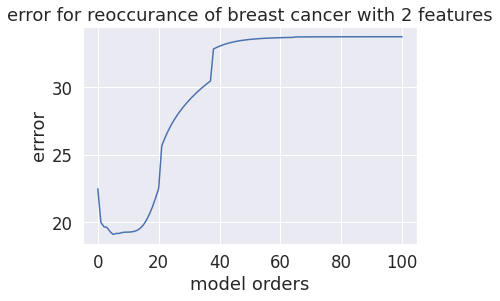

In [ ]:
data=two_attribute_dataset.to_numpy()
x=data[:,1:].T
x=x.astype(float)
t=data[:,0].T
t=t.astype(float)

M=100
rms=np.array([])
for m in range(M+1):
    phi=poly_matrix(x,m)
    weight_vector=closed_form_solution(phi,t)
    y=weight_vector.T@phi
    
    rms=np.append(rms,np.sqrt(sum(((y-t)**2))/(len(y))))

m_value=np.argmin(rms)
min_err=rms[m_value]
print("Minimum error occurs for 2 attributes for M =",m_value,"and its values is ",min_err)
plt.figure()
plt.plot(rms)
plt.xlabel("model orders")
plt.ylabel("errror")
plt.title("error for reoccurance of breast cancer with 2 features")
plt.show()

predicted values without any kernel for 30 features [-8.55008214e-137 -1.95643340e-139  4.73415073e-141 -6.89282990e-142
  3.14781716e-143  6.90418415e-145  3.99610042e-147  4.33706659e-150
  3.07448182e-151 -8.38829005e-151  5.72027534e-153 -2.72303664e-153
 -1.59884674e-153 -6.37624280e-154  4.36821927e-155 -1.63288331e-155
 -5.84989955e-157  1.40303335e-158  8.40911737e-158  3.37370695e-158
 -8.79311650e-161  1.74850264e-162 -7.85922203e-163 -1.66365791e-163
  2.64948503e-165  1.20379093e-164 -5.46099586e-166  6.50951896e-165
 -5.28973620e-167 -6.55543843e-169  4.51416864e-168 -8.58509737e-169
 -2.74222137e-169  1.74111085e-169  2.89797583e-170  1.62631924e-171
 -1.48492780e-171  4.98077043e-172 -1.22538011e-171 -4.92794770e-173
 -1.33440916e-172 -1.47294981e-173  1.55328509e-175  1.94206428e-198
  1.51548823e-197 -1.88710837e-219  1.31532919e-269 -2.44954810e-218
  1.23550759e-270 -2.61210727e-217  7.08441892e-272 -3.28748562e-216
  3.82432240e-273 -3.10220277e-215  5.02565047e-274

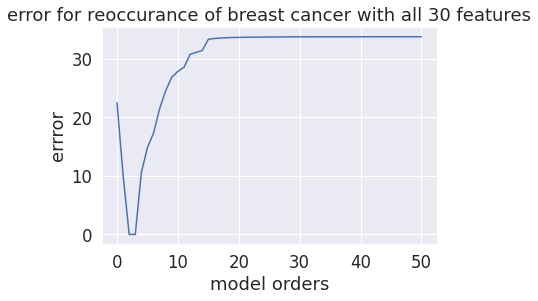

In [ ]:
#30 features
#Finally with all 30 features using polynomial kernel
data=dataset.to_numpy()
x=data[:,1:30].T
x=x.astype(float)
t=data[:,0].T
t=t.astype(float)
pred=closed_form_solution(phi,t) #Without any kernel
print("predicted values without any kernel for 30 features",pred)

#With the help of polynomial kernel,linear regression is performed
M=50
rms=np.array([])
for m in range(M+1):
    phi=poly_matrix(x,m)
    weight_vector=closed_form_solution(phi,t)
    y=weight_vector.T@phi
    
    rms=np.append(rms,np.sqrt(sum(((y-t)**2))/(len(y))))
    
#Final value of model order M for which error is minimum
m_value=np.argmin(rms)
min_err=rms[m_value]
print("Minimum error occurs for 30 features for M =",m_value,"and its values is ",min_err)
y_pred=[]
#BEST FIT FOR M=2
for m in range(2+1):
    phi=poly_matrix(x,m)
    weight_vector=closed_form_solution(phi,t)
    y=weight_vector.T@phi
    y_pred=np.append(y_pred,y)
print("Predicted values with model order 2 with all 30 features using polynomial regression is:",y_pred)  
plt.figure()
plt.plot(rms)
plt.xlabel("model orders")
plt.ylabel("errror")
plt.title("error for reoccurance of breast cancer with all 30 features")
plt.show()

<b> Part - (3): Multiple Output Regression </b>
Until now, we mainly concentrated on a single target variable from the input vector. In this example, we use supply chain management data (scm1d) to predict target vector from the input vector. A brief description of multi output regression can be found in Section 3.1.5 of Bishop’s book. <br>
[Link to Dataset](https://osdn.net/projects/sfnet_mulan/downloads/datasets/multi-target%20regression%20datasets/scm1d-train.zip) <br>
[Dataset Description](https://arxiv.org/pdf/1211.6581.pdf)

In [ ]:
#You may use scipy library to load the data set
from scipy.io import arff  
data, meta = arff.loadarff('scm1d-train.arff')

def least_squares(X,y,regularized=False,lamda=0.01):
    if regularized:
        m,n=(X.T@X).shape
        W=(np.linalg.inv(X.T@X + lamda*np.eye(m,n))@X.T).T@y.T    
    else:     W=np.linalg.pinv(X).T@y.T
    return W

def stack_onearray(x,N):
    one_array=np.ones((1,N))
    return np.vstack((one_array,x))

def poly_kernel(x,M):
    if(m==0):
        poly_kernel=np.ones((1,x.shape[1]))
    else:
        poly_kernel=stack_onearray(x,x.shape[1])
        for i in range(2,M+1):
            poly_kernel=np.vstack((poly_kernel,x**i))
    return poly_kernel

X = np.array(data.tolist(), dtype=np.float32)
Y  = X[:,X.shape[1]-16:].T
input = X[:,:X.shape[1]-16]
X=X.T

P=[0.1,0.3,0.5,0.8,1]
for p in P: 
    Xtr=X[:,0:int(p*X.shape[1])]
    Ytr=Y[:,0:int(p*Y.shape[1])]
    Xte=X[:,int(p*X.shape[1]):]
    Yte=Y[:,int(p*Y.shape[1]):]
    Xte=Yte[:,:Xte.shape[1]-1]
    Yte=Yte[:,:Yte.shape[1]-1]

    phi=poly_kernel(Xtr,2)
    weight_vector=least_squares(phi,Ytr)
    y=weight_vector.T@phi
    #Printting the size of multivariate target 
    print('Size of multivariate target', y.shape)
    
    err=sum(sum((y-Ytr)**2)/y.shape[1])
    print('Training error for data size =',int(p*X.shape[1]),'is ',err,'\n')

Size of multivariate target (16, 814)
Training error for data size = 814 is  3.916922579997738e-18 

Size of multivariate target (16, 2443)
Training error for data size = 2443 is  1.6185591941668384e-18 

Size of multivariate target (16, 4072)
Training error for data size = 4072 is  2.398694043128643e-17 

Size of multivariate target (16, 6516)
Training error for data size = 6516 is  1.6123199751840038e-18 

Size of multivariate target (16, 8145)
Training error for data size = 8145 is  1.4456135934708032e-18 



<b> Report  </b>
1. 

2. 

3. 